In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats 
from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency, pearsonr, ttest_ind, mannwhitneyu, f_oneway


from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split


# Acquisition of dataset suitable for exploratory data analysis: 

In [4]:
import os
os.chdir(r'C:\Users\Naina Singam\OneDrive\Desktop\Data Science\Data Mining\DM Project')
os.getcwd()

'C:\\Users\\Naina Singam\\OneDrive\\Desktop\\Data Science\\Data Mining\\DM Project'

# Importing the dataset: 

In [5]:
df = pd.read_csv(r"C:\Users\Naina Singam\OneDrive\Desktop\Data Science\Data Mining\DM Project\BankChurners.csv")

# Displaying the first 5 and last 5 records of the dataset: 

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [8]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,NaN
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,NaN
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,NaN
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,NaN
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,NaN


# Identifying the data types for each variable

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [166]:
df.shape

(10127, 32)

# Determining the number of missing entries per variable

In [12]:
df.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

No missing values except for Unnamed
Unnamed 21 has no entitiles - dropping the column
More than two values after decimal - setting it two two

In [6]:
df = df.drop(columns='Unnamed: 21', axis=1)

In [7]:
df=df.drop(columns=['CLIENTNUM'], axis=1)

# Identifying and counting duplicate records

In [14]:
df.duplicated().sum()

0

no duplicate values

# Conducting univariate analysis on all variables with visualizations

In [182]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Univariate Analysis for categorical variable: 

### Univariate Analysis for categorical variable: Attrition_Flag 

In [9]:
df_cat=df.select_dtypes(include='object')# Just get me the categorical variables
df_cat.columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

### Attrition_Flag

In [23]:
df["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

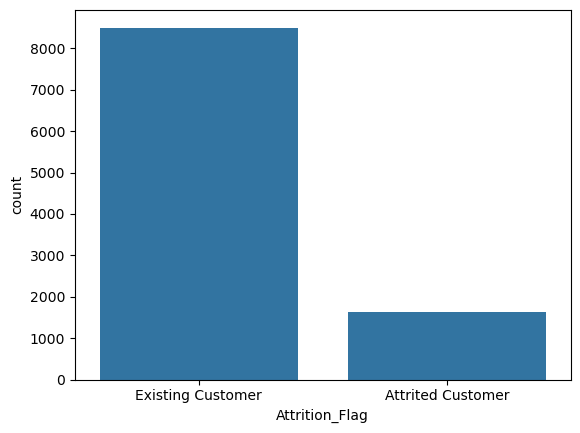

In [231]:
plt.figure()
sns.countplot(x='Attrition_Flag', data=df)

plt.show()

### Univariate Analysis for categorical variable: Education_Level 

In [235]:
df["Education_Level"].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

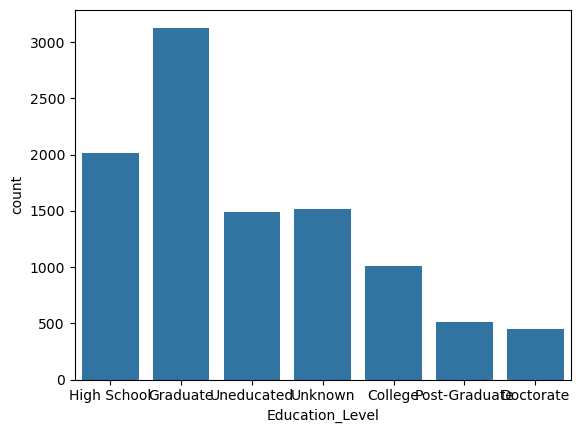

In [236]:
plt.figure()
sns.countplot(x='Education_Level', data=df)

plt.show()


Summary for column: Attrition_Flag
Frequency:
 Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Mode: Existing Customer
Levels (unique values): ['Existing Customer' 'Attrited Customer']


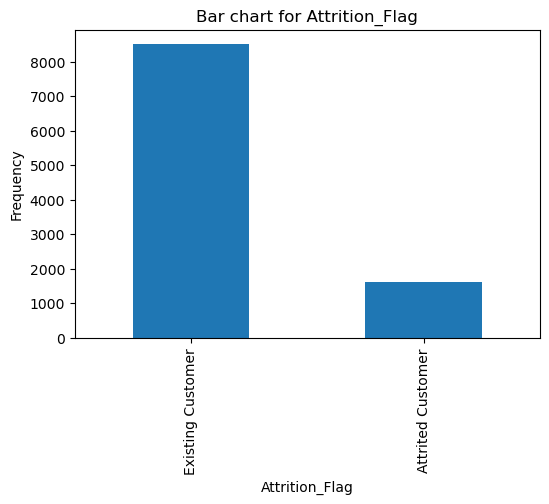

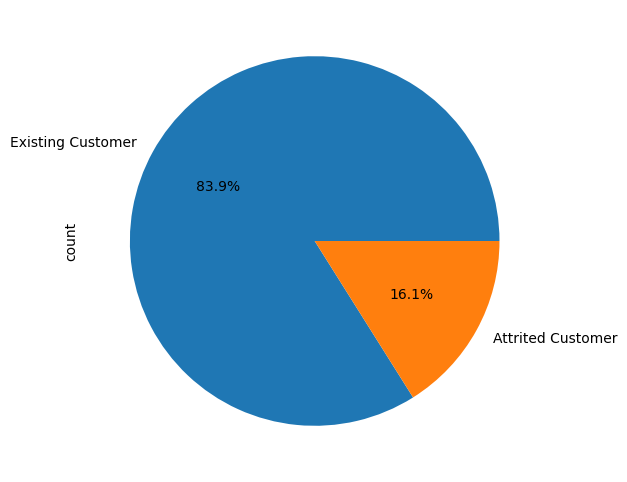


Summary for column: Gender
Frequency:
 Gender
F    5358
M    4769
Name: count, dtype: int64
Mode: F
Levels (unique values): ['M' 'F']


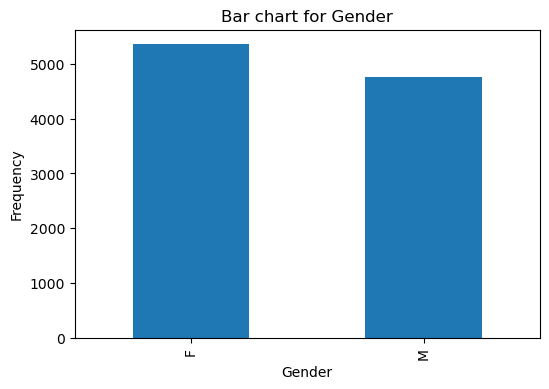

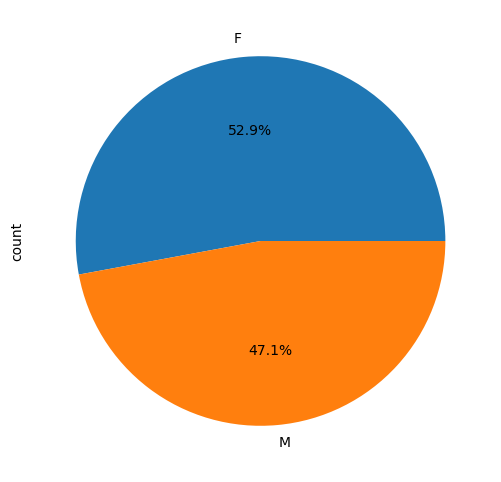


Summary for column: Education_Level
Frequency:
 Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Mode: Graduate
Levels (unique values): ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']


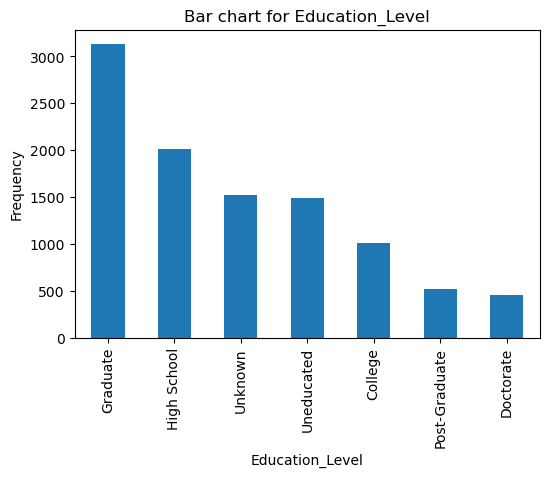

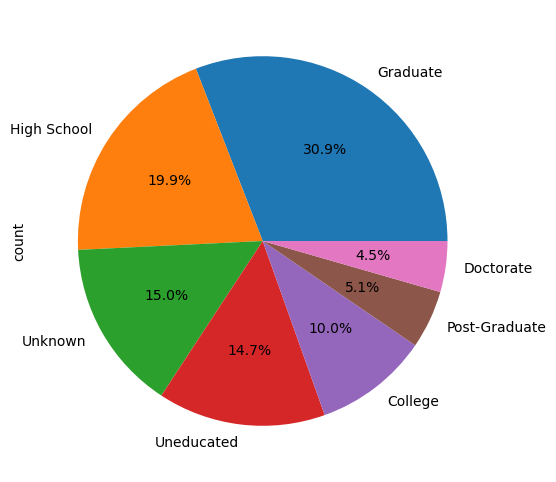


Summary for column: Marital_Status
Frequency:
 Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Mode: Married
Levels (unique values): ['Married' 'Single' 'Unknown' 'Divorced']


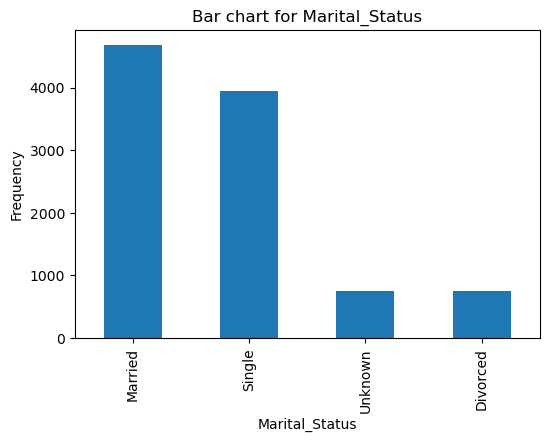

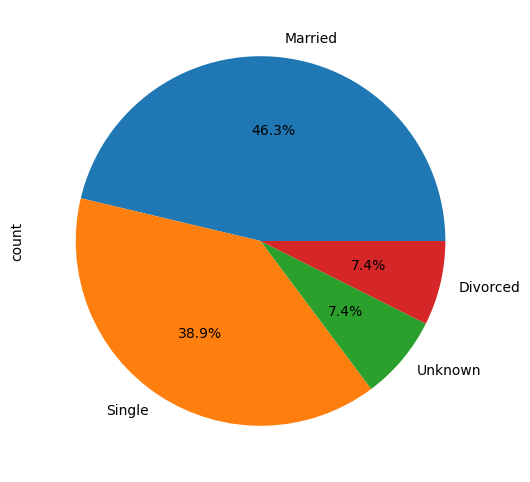


Summary for column: Income_Category
Frequency:
 Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Mode: Less than $40K
Levels (unique values): ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


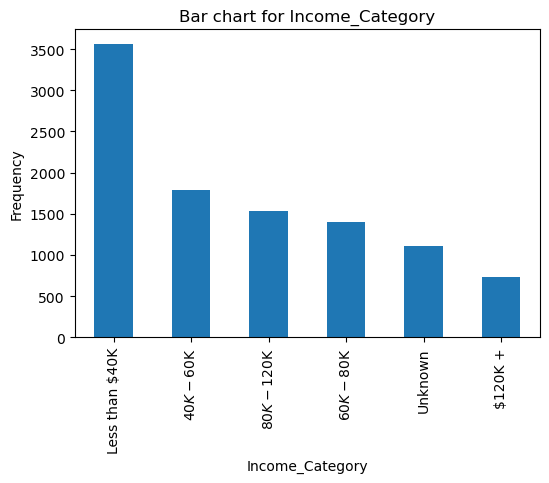

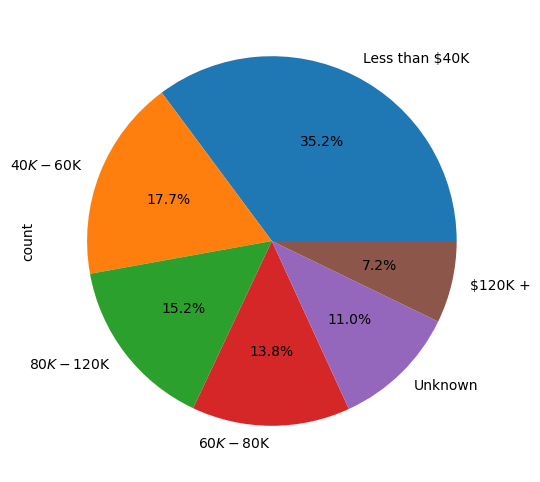


Summary for column: Card_Category
Frequency:
 Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
Mode: Blue
Levels (unique values): ['Blue' 'Gold' 'Silver' 'Platinum']


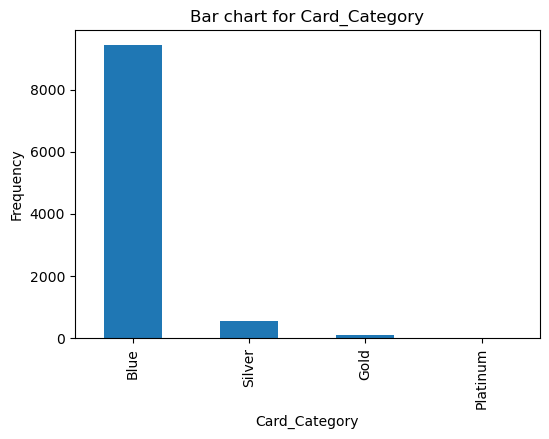

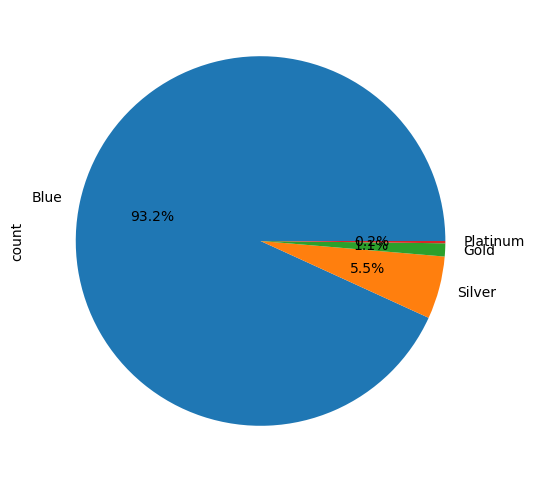

In [8]:
for col in df_cat.columns:
    print(f"\nSummary for column: {col}")
    
    freq = df_cat[col].value_counts()
    print("Frequency:\n", freq)
    
    mode = df_cat[col].mode()[0]
    print("Mode:", mode)
    
    levels = df_cat[col].unique()
    print("Levels (unique values):", levels)
    
    plt.figure(figsize=(6, 4))
    plt.title(f"Bar chart for {col}")
    freq.plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # To use a pie chart instead, uncomment the next two lines:
    plt.figure(figsize=(6, 6))
    freq.plot(kind='pie', autopct='%1.1f%%')
    
    plt.show()


In [9]:
df.Marital_Status.value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

There are 749 "unknowns",impting with mode.

In [71]:
df['Marital_Status'] = df['Marital_Status'].replace('Unknown','Married')

In [11]:
df.Marital_Status.value_counts()

Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64

In [12]:
df.Education_Level.value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

There are 1519 "unknowns",leaving it as is to know thier effect.

In [13]:
df.Income_Category.value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

There are 1112 "unknowns", leaving it as is to know thier effect.

# Univariate Analysis for numeric variable: 

In [10]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [11]:
#numerical variables
df_num=df.select_dtypes(exclude='object')# Just get me the numeric variables
df_num.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [16]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,10127.00,0.76,0.22,0.00,0.63,0.74,0.86,3.40


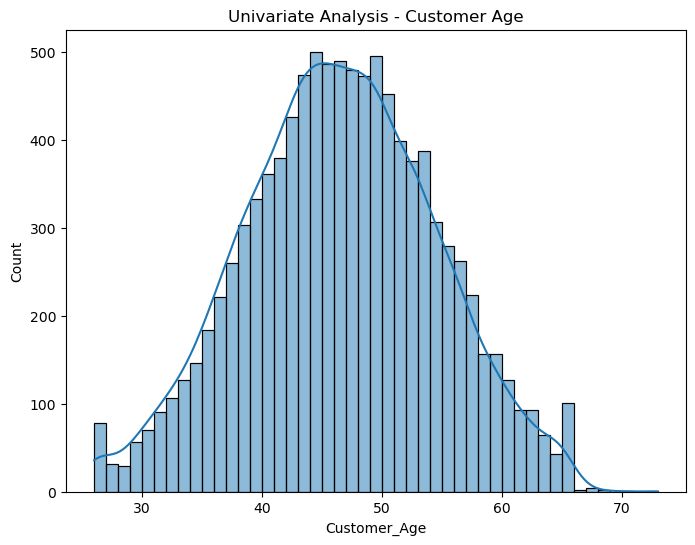

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], kde=True)
plt.title('Univariate Analysis - Customer Age')
plt.show()

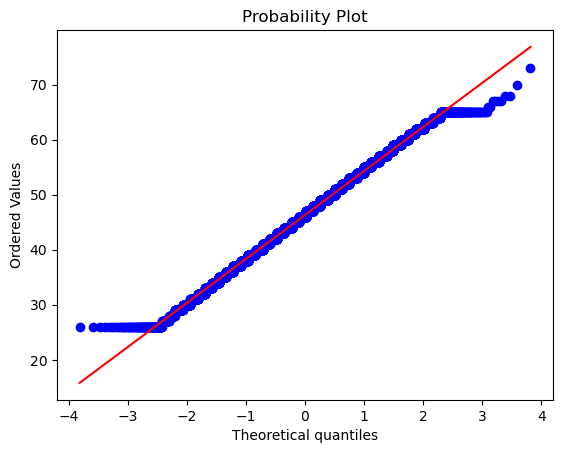

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['Customer_Age'], dist="norm", plot=plt)
plt.show()


In [13]:
from scipy.stats import shapiro

stat, p = shapiro(df['Customer_Age'])
print(f'Statistics={stat}, p={p}')
if p > 0.05:
    print('Data looks normal')
else:
    print('Data does not look normal')


Statistics=0.9960411787033081, p=5.610766359644983e-16
Data does not look normal


array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>],
       [<Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>],
       [<Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>,
        <Axes: title={'center': 'Total_Trans_Ct'}>],
       [<Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>, <Axes: >,
        <Axes: >]], dtype=object)

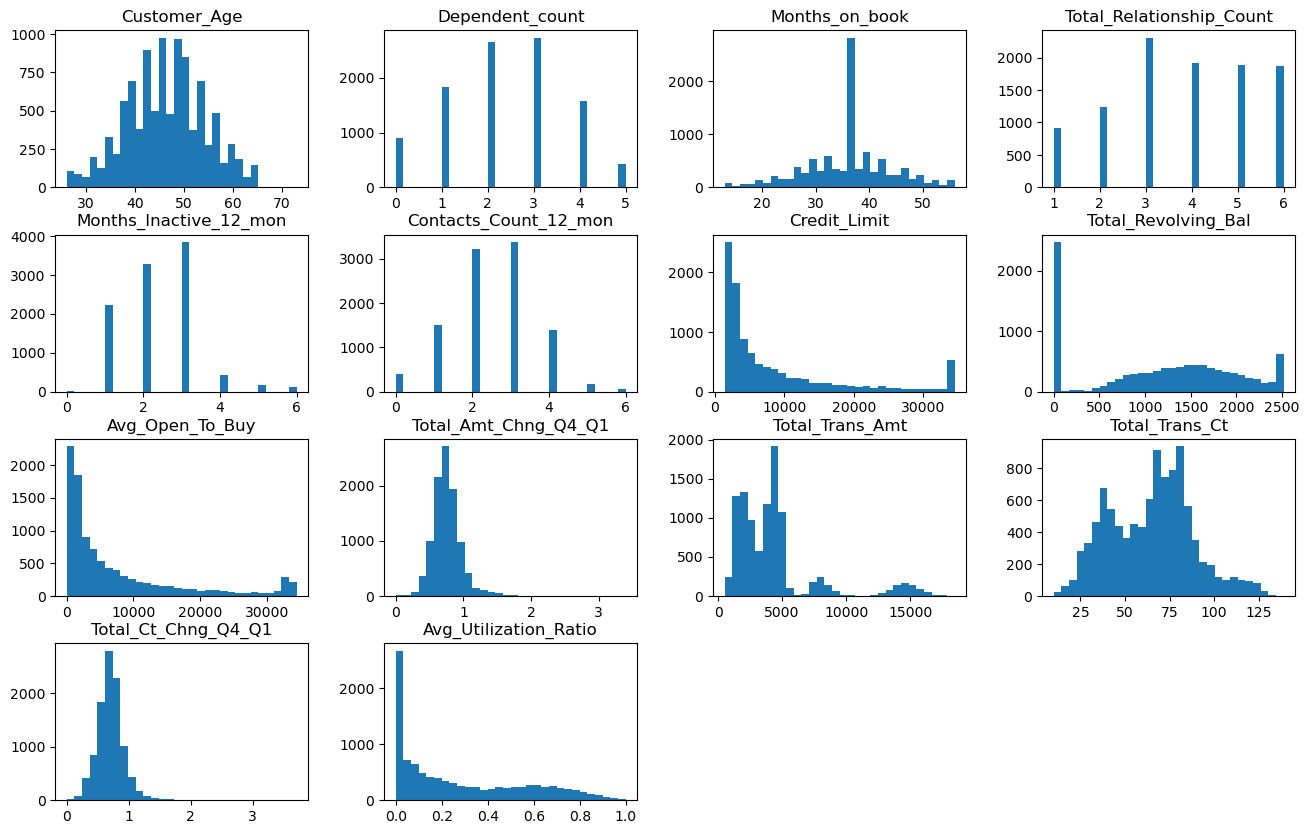

In [19]:
df.hist(grid=False,
       figsize=(16, 10),
       bins=30)

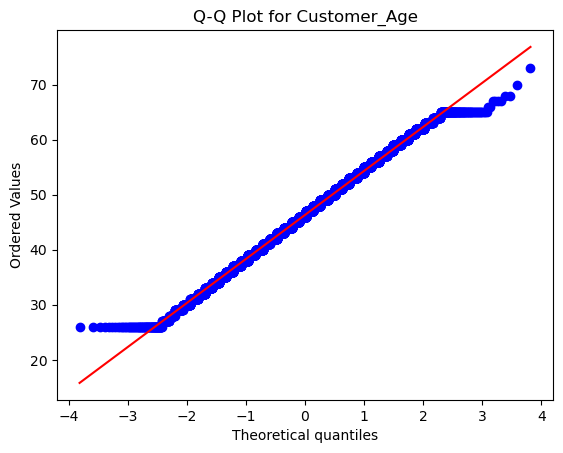

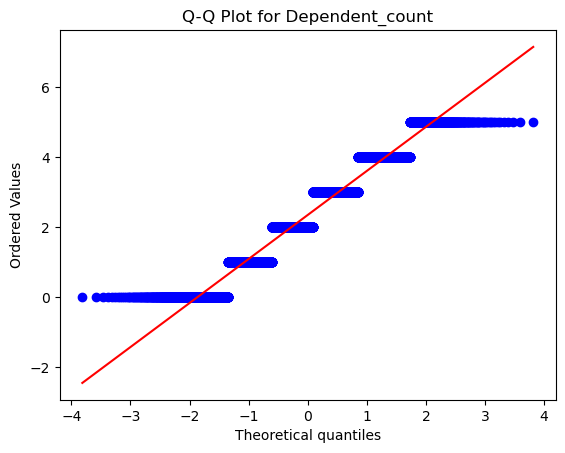

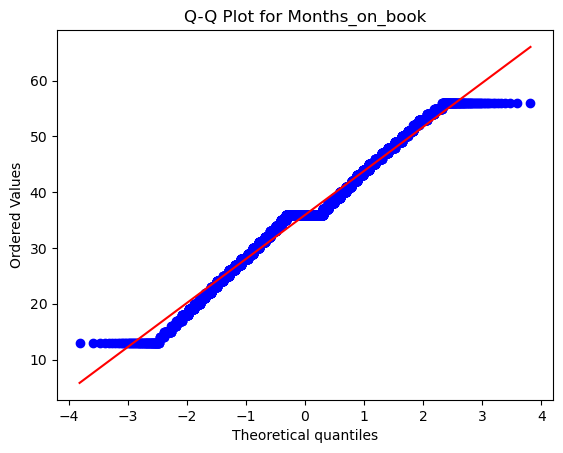

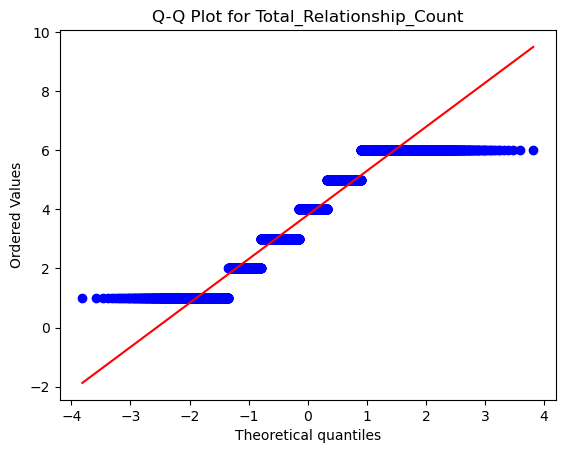

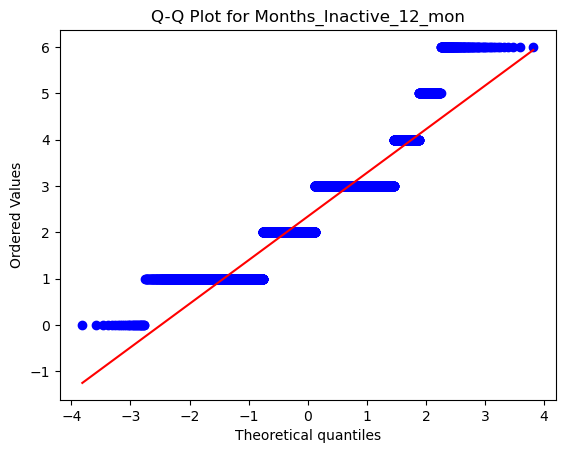

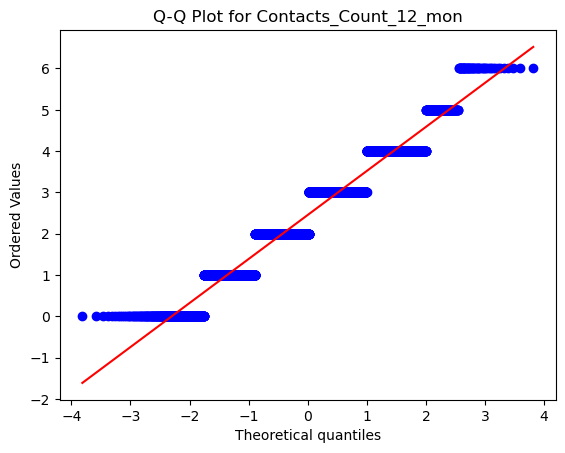

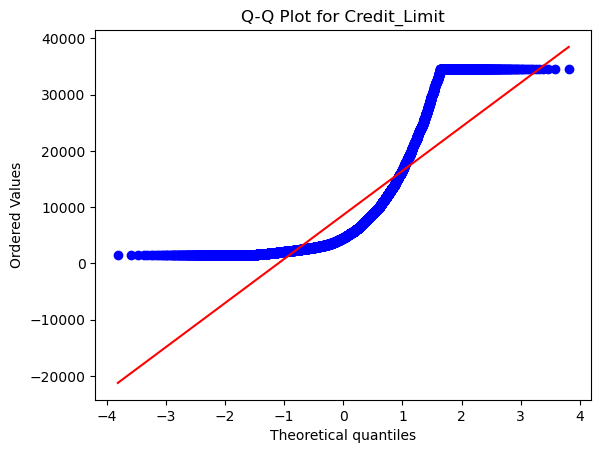

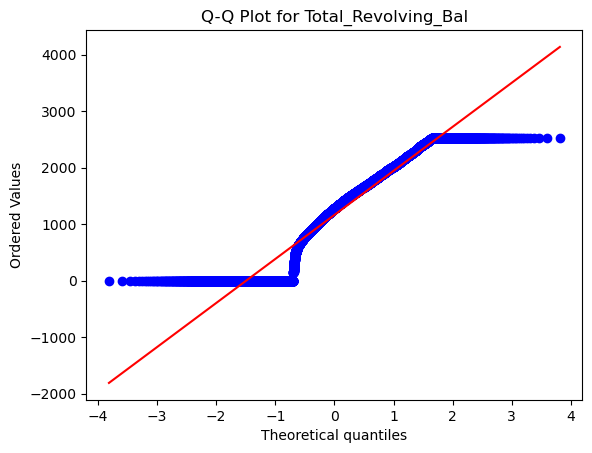

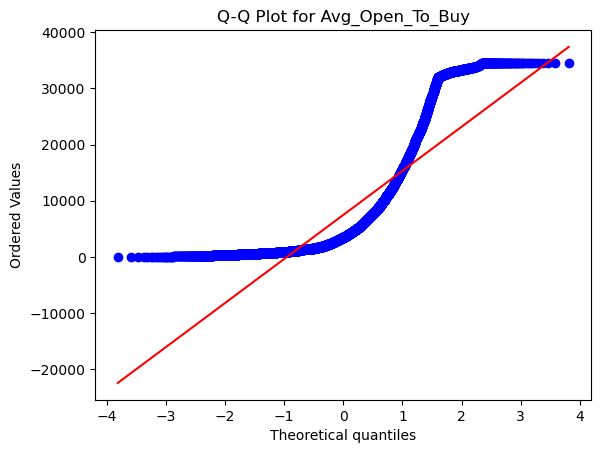

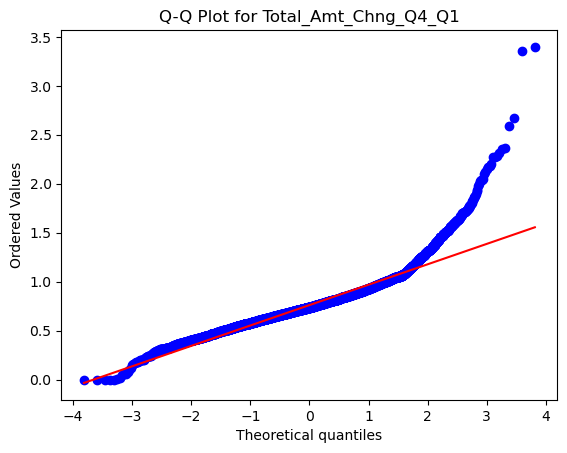

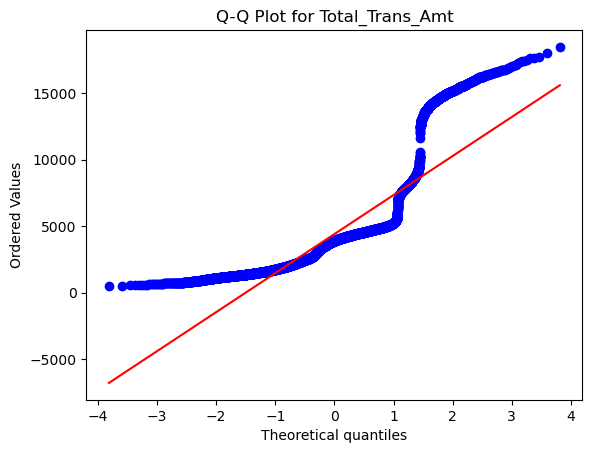

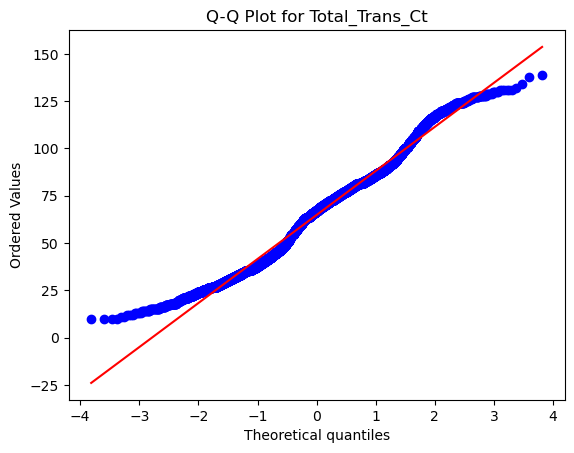

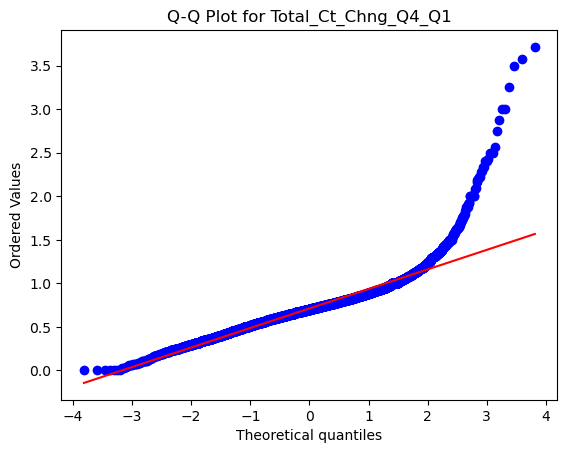

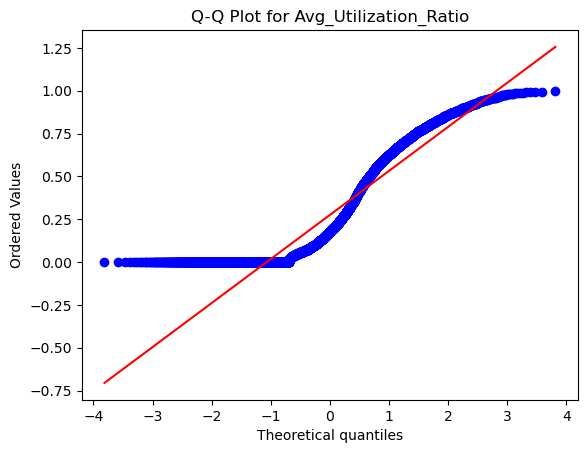

In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming df_num is your DataFrame with numeric columns
for column in df_num.columns:
    plt.figure()
    stats.probplot(df_num[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()


In [20]:
from scipy.stats import shapiro

# Assuming df_num is your DataFrame with numeric columns
for column in df_num.columns:
    stat, p = shapiro(df_num[column])
    print(f'Column: {column} - Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'{column}: Data looks normal')
    else:
        print(f'{column}: Data does not look normal')
    print('---')  # Separator for readability


Column: Customer_Age - Statistics=0.9960411787033081, p=5.610766359644983e-16
Customer_Age: Data does not look normal
---
Column: Dependent_count - Statistics=0.9369626045227051, p=0.0
Dependent_count: Data does not look normal
---
Column: Months_on_book - Statistics=0.9769161343574524, p=1.9024193865411893e-37
Months_on_book: Data does not look normal
---
Column: Total_Relationship_Count - Statistics=0.9203110337257385, p=0.0
Total_Relationship_Count: Data does not look normal
---
Column: Months_Inactive_12_mon - Statistics=0.8677750825881958, p=0.0
Months_Inactive_12_mon: Data does not look normal
---
Column: Contacts_Count_12_mon - Statistics=0.9283722043037415, p=0.0
Contacts_Count_12_mon: Data does not look normal
---
Column: Credit_Limit - Statistics=0.7418274879455566, p=0.0
Credit_Limit: Data does not look normal
---
Column: Total_Revolving_Bal - Statistics=0.9154627919197083, p=0.0
Total_Revolving_Bal: Data does not look normal
---
Column: Avg_Open_To_Buy - Statistics=0.744501

In [23]:
from scipy import stats
import numpy as np
import pandas as pd

# Initialize a new DataFrame to store the transformed data
df_num_transformed = pd.DataFrame()

# Loop through all columns in df_num
for column in df_num.columns:
    # Ensure the column has only positive values before applying Box-Cox
    if (df_num[column] > 0).all():
        df_num_transformed[f'boxcox_{column}'], _ = stats.boxcox(df_num[column])
    else:
        # Handle cases where the column has zero or negative values by adding 1 (or a small constant)
        df_num_transformed[f'boxcox_{column}'], _ = stats.boxcox(df_num[column] + 1)

# Print the transformed DataFrame
print(df_num_transformed.head())


   boxcox_Customer_Age  boxcox_Dependent_count  boxcox_Months_on_book  \
0                48.37                    2.74                  59.11   
1                52.91                    4.43                  68.10   
2                55.18                    2.74                  53.81   
3                42.72                    3.60                  50.31   
4                42.72                    2.74                  28.43   

   boxcox_Total_Relationship_Count  boxcox_Months_Inactive_12_mon  \
0                             3.90                           0.78   
1                             4.85                           0.78   
2                             2.93                           0.78   
3                             1.97                           2.12   
4                             3.90                           0.78   

   boxcox_Contacts_Count_12_mon  boxcox_Credit_Limit  \
0                          2.92                 3.25   
1                          1.96   

In [25]:
from scipy.stats import shapiro

# Assuming df_num_transformed is your DataFrame with numeric columns
for column in df_num_transformed.columns:
    stat, p = shapiro(df_num_transformed[column])
    print(f'Column: {column} - Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'{column}: Data looks normal')
    else:
        print(f'{column}: Data does not look normal')
    print('---')  # Separator for readability


Column: boxcox_Customer_Age - Statistics=0.9959941506385803, p=4.3364465833570665e-16
boxcox_Customer_Age: Data does not look normal
---
Column: boxcox_Dependent_count - Statistics=0.9360751509666443, p=0.0
boxcox_Dependent_count: Data does not look normal
---
Column: boxcox_Months_on_book - Statistics=0.9776738286018372, p=5.9551920268902234e-37
boxcox_Months_on_book: Data does not look normal
---
Column: boxcox_Total_Relationship_Count - Statistics=0.9202536940574646, p=0.0
boxcox_Total_Relationship_Count: Data does not look normal
---
Column: boxcox_Months_Inactive_12_mon - Statistics=0.8800936341285706, p=0.0
boxcox_Months_Inactive_12_mon: Data does not look normal
---
Column: boxcox_Contacts_Count_12_mon - Statistics=0.9283053874969482, p=0.0
boxcox_Contacts_Count_12_mon: Data does not look normal
---
Column: boxcox_Credit_Limit - Statistics=0.9575985074043274, p=0.0
boxcox_Credit_Limit: Data does not look normal
---
Column: boxcox_Total_Revolving_Bal - Statistics=0.78424113988876

In [19]:
df_num.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Customer_Age,-0.03,-0.29
Dependent_count,-0.02,-0.68
Months_on_book,-0.11,0.40
Total_Relationship_Count,-0.16,-1.01
Months_Inactive_12_mon,0.63,1.10
Contacts_Count_12_mon,0.01,0.00
Credit_Limit,1.67,1.81
Total_Revolving_Bal,-0.15,-1.15
Avg_Open_To_Buy,1.66,1.80
Total_Amt_Chng_Q4_Q1,1.73,9.99


## Data is not normal even after transformation, Going forward with Central Limit Therom n considering the data to be normal 

# Detecting outliers using the Tukey method:
Potential outliers are observations that lie outside the lower and upper limits.

Lower limit = Q1 - 1.5 * IQR
Upper limit = Q3 + 1.5 * IQRoints


In [20]:
df.columns 

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [21]:
df_num = df.select_dtypes(exclude='object')
df_num.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

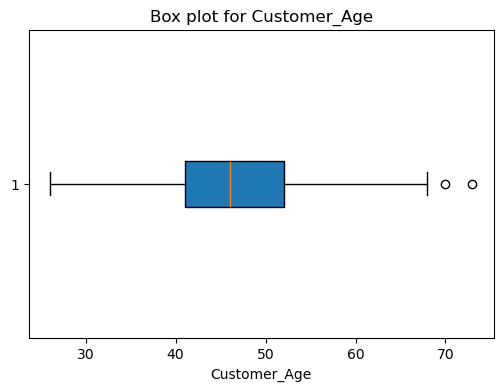

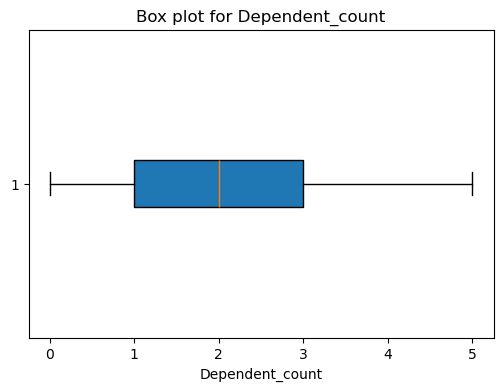

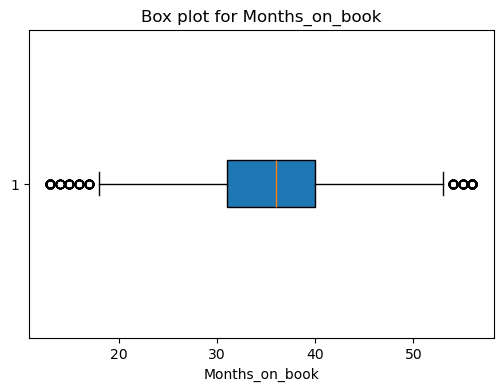

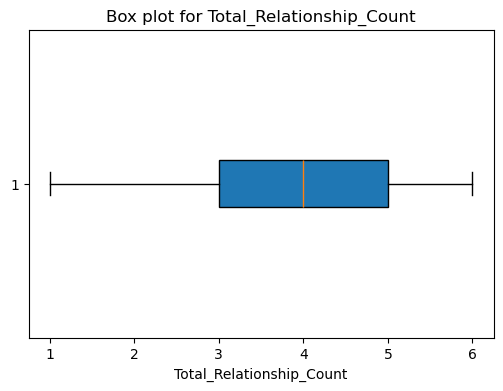

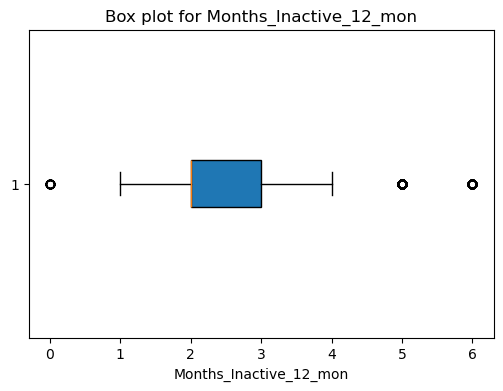

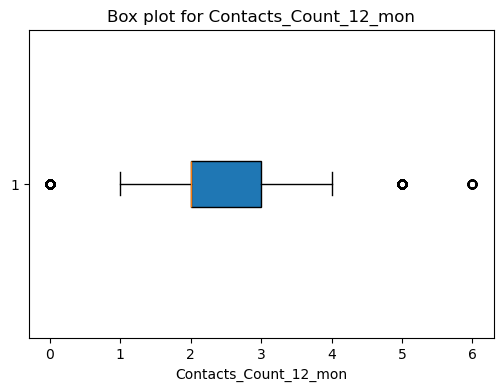

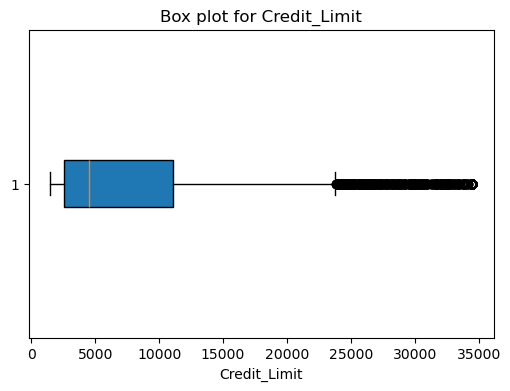

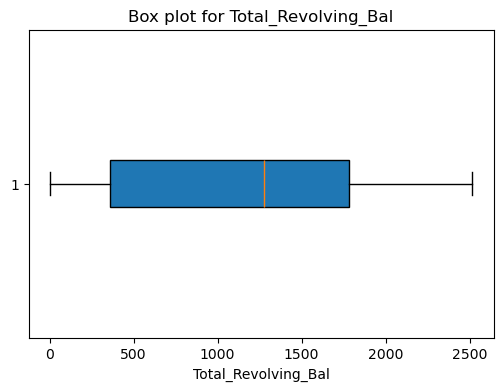

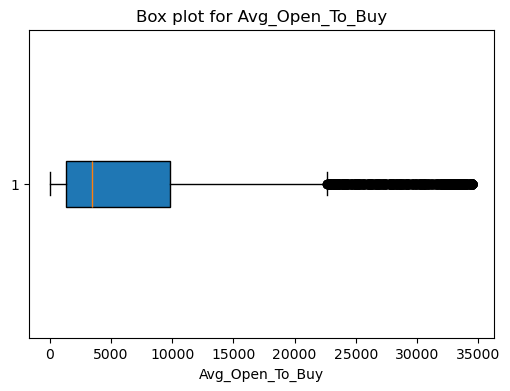

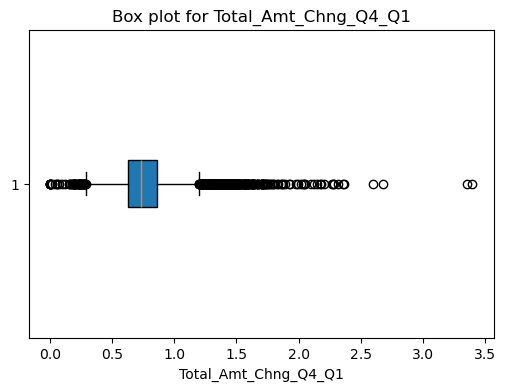

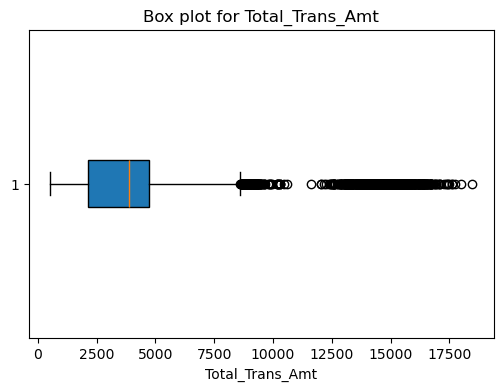

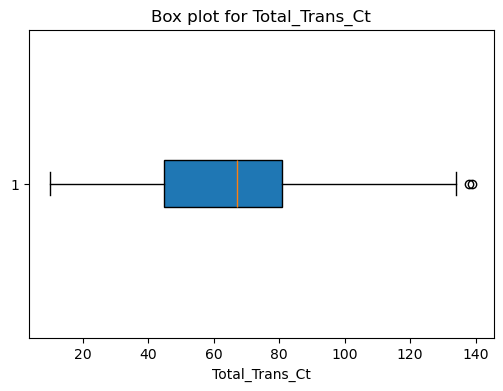

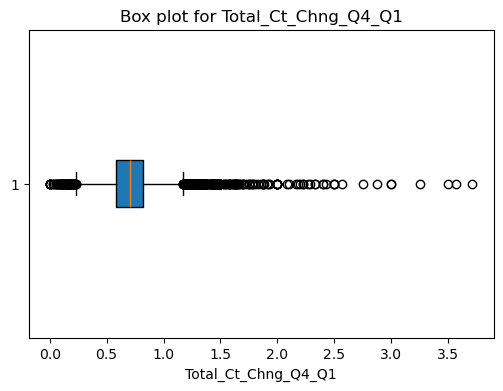

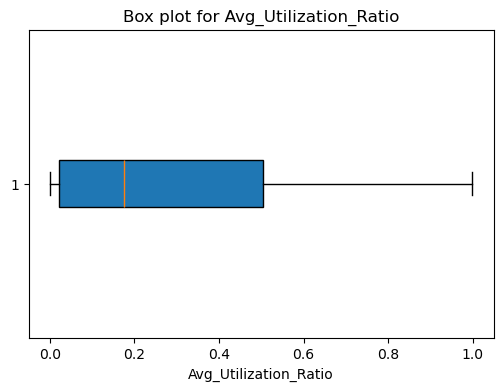

In [22]:
import matplotlib.pyplot as plt


for col in df_num.columns:
    plt.figure(figsize=(6, 4))  
    plt.boxplot(df_num[col], vert=False, patch_artist=True)  # Create a horizontal box plot
    plt.title(f'Box plot for {col}')
    plt.xlabel(col)
    plt.show()  


### Based on the Box plot 'Dependent_count', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio' do not have outliers

In [162]:
def tukey_outliers(series):
    Q1 = series.quantile(0.25)  
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1  
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return series[(series < lower_limit) | (series > upper_limit)]  


outliers = tukey_outliers(df['Customer_Age'])
print("Outliers:\n", outliers)

Outliers:
 251    73
254    70
Name: Customer_Age, dtype: int64


In [41]:
outliers = tukey_outliers(df['Months_on_book'])
print("Outliers:\n", outliers)

Outliers:
 11       54
18       56
27       56
39       56
52       54
         ..
10054    15
10062    17
10069    14
10107    54
10114    15
Name: Months_on_book, Length: 386, dtype: int64


In [42]:
outliers = tukey_outliers(df['Months_Inactive_12_mon'])
print("Outliers:\n", outliers)

Outliers:
 12       6
29       0
31       5
108      0
118      6
        ..
9964     5
10028    5
10035    6
10049    5
10066    6
Name: Months_Inactive_12_mon, Length: 331, dtype: int64


In [43]:
outliers = tukey_outliers(df['Contacts_Count_12_mon'])
print("Outliers:\n", outliers)

Outliers:
 2        0
4        0
8        0
12       0
20       0
        ..
10101    5
10106    5
10109    5
10114    5
10120    0
Name: Contacts_Count_12_mon, Length: 629, dtype: int64


In [44]:
outliers = tukey_outliers(df['Credit_Limit'])
print("Outliers:\n", outliers)

Outliers:
 6       34516.00
7       29081.00
16      30367.00
40      32426.00
45      34516.00
          ...   
10098   34516.00
10100   29808.00
10104   29663.00
10110   34516.00
10112   34516.00
Name: Credit_Limit, Length: 984, dtype: float64


In [45]:
outliers = tukey_outliers(df['Avg_Open_To_Buy'])
print("Outliers:\n", outliers)

Outliers:
 6       32252.00
7       27685.00
16      28005.00
40      31848.00
45      34516.00
          ...   
10100   29808.00
10103   22754.00
10104   27920.00
10110   33425.00
10112   34516.00
Name: Avg_Open_To_Buy, Length: 963, dtype: float64


In [46]:
outliers = tukey_outliers(df['Total_Amt_Chng_Q4_Q1'])
print("Outliers:\n", outliers)

Outliers:
 0       1.33
1       1.54
2       2.59
3       1.41
4       2.17
        ... 
9793    0.23
9808    0.20
9963    0.22
10008   0.20
10119   0.17
Name: Total_Amt_Chng_Q4_Q1, Length: 396, dtype: float64


In [47]:
outliers = tukey_outliers(df['Total_Trans_Amt'])
print("Outliers:\n", outliers)

Outliers:
 8591      8693
8650      8947
8670      8854
8708      8796
8734      8778
         ...  
10121    14596
10122    15476
10123     8764
10124    10291
10126    10294
Name: Total_Trans_Amt, Length: 896, dtype: int64


In [48]:
outliers = tukey_outliers(df['Total_Trans_Ct'])
print("Outliers:\n", outliers)

Outliers:
 9324    139
9586    138
Name: Total_Trans_Ct, dtype: int64


In [49]:
outliers = tukey_outliers(df['Total_Ct_Chng_Q4_Q1'])
print("Outliers:\n", outliers)

Outliers:
 0      1.62
1      3.71
2      2.33
3      2.33
4      2.50
       ... 
9388   0.18
9672   1.29
9856   1.21
9917   1.21
9977   1.68
Name: Total_Ct_Chng_Q4_Q1, Length: 394, dtype: float64


In [23]:
from scipy.stats import levene

# Select the numeric columns for which you want to conduct the Levene's test
numeric_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                   'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                   'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                   'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


for column in numeric_columns:
    stat, p_value = levene(df[df['Attrition_Flag'] == 'Existing Customer'][column],
                           df[df['Attrition_Flag'] == 'Attrited Customer'][column])
    
    print(f"Levene's test for {column}: Stat = {stat:.4f}, p-value = {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"Null hypothesis rejected: The variances for '{column}' are significantly different between the groups.\n")
    else:
        print(f"Failed to reject the null hypothesis: No significant difference in variances for '{column}' between the groups.\n")


Levene's test for Customer_Age: Stat = 5.6426, p-value = 0.0175
Null hypothesis rejected: The variances for 'Customer_Age' are significantly different between the groups.

Levene's test for Dependent_count: Stat = 0.0036, p-value = 0.9525
Failed to reject the null hypothesis: No significant difference in variances for 'Dependent_count' between the groups.

Levene's test for Months_on_book: Stat = 2.7072, p-value = 0.0999
Failed to reject the null hypothesis: No significant difference in variances for 'Months_on_book' between the groups.

Levene's test for Total_Relationship_Count: Stat = 0.3935, p-value = 0.5305
Failed to reject the null hypothesis: No significant difference in variances for 'Total_Relationship_Count' between the groups.

Levene's test for Months_Inactive_12_mon: Stat = 75.9755, p-value = 0.0000
Null hypothesis rejected: The variances for 'Months_Inactive_12_mon' are significantly different between the groups.

Levene's test for Contacts_Count_12_mon: Stat = 29.3068, p

# Bivariate Analysis:

### Bivariate analysis -Continuous Vs. Continuous:

In [24]:
df_num=df.select_dtypes(exclude='object')# Just get me the numeric variables
df_num.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [25]:
df.corr(numeric_only=True)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.00,-0.12,0.79,-0.01,0.05,-0.02,0.00,0.01,0.00,-0.06,-0.05,-0.07,-0.01,0.01
Dependent_count,-0.12,1.00,-0.10,-0.04,-0.01,-0.04,0.07,-0.00,0.07,-0.04,0.03,0.05,0.01,-0.04
Months_on_book,0.79,-0.10,1.00,-0.01,0.07,-0.01,0.01,0.01,0.01,-0.05,-0.04,-0.05,-0.01,-0.01
Total_Relationship_Count,-0.01,-0.04,-0.01,1.00,-0.00,0.06,-0.07,0.01,-0.07,0.05,-0.35,-0.24,0.04,0.07
Months_Inactive_12_mon,0.05,-0.01,0.07,-0.00,1.00,0.03,-0.02,-0.04,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01
Contacts_Count_12_mon,-0.02,-0.04,-0.01,0.06,0.03,1.00,0.02,-0.05,0.03,-0.02,-0.11,-0.15,-0.09,-0.06
Credit_Limit,0.00,0.07,0.01,-0.07,-0.02,0.02,1.00,0.04,1.00,0.01,0.17,0.08,-0.00,-0.48
Total_Revolving_Bal,0.01,-0.00,0.01,0.01,-0.04,-0.05,0.04,1.00,-0.05,0.06,0.06,0.06,0.09,0.62
Avg_Open_To_Buy,0.00,0.07,0.01,-0.07,-0.02,0.03,1.00,-0.05,1.00,0.01,0.17,0.07,-0.01,-0.54
Total_Amt_Chng_Q4_Q1,-0.06,-0.04,-0.05,0.05,-0.03,-0.02,0.01,0.06,0.01,1.00,0.04,0.01,0.38,0.04


<Axes: >

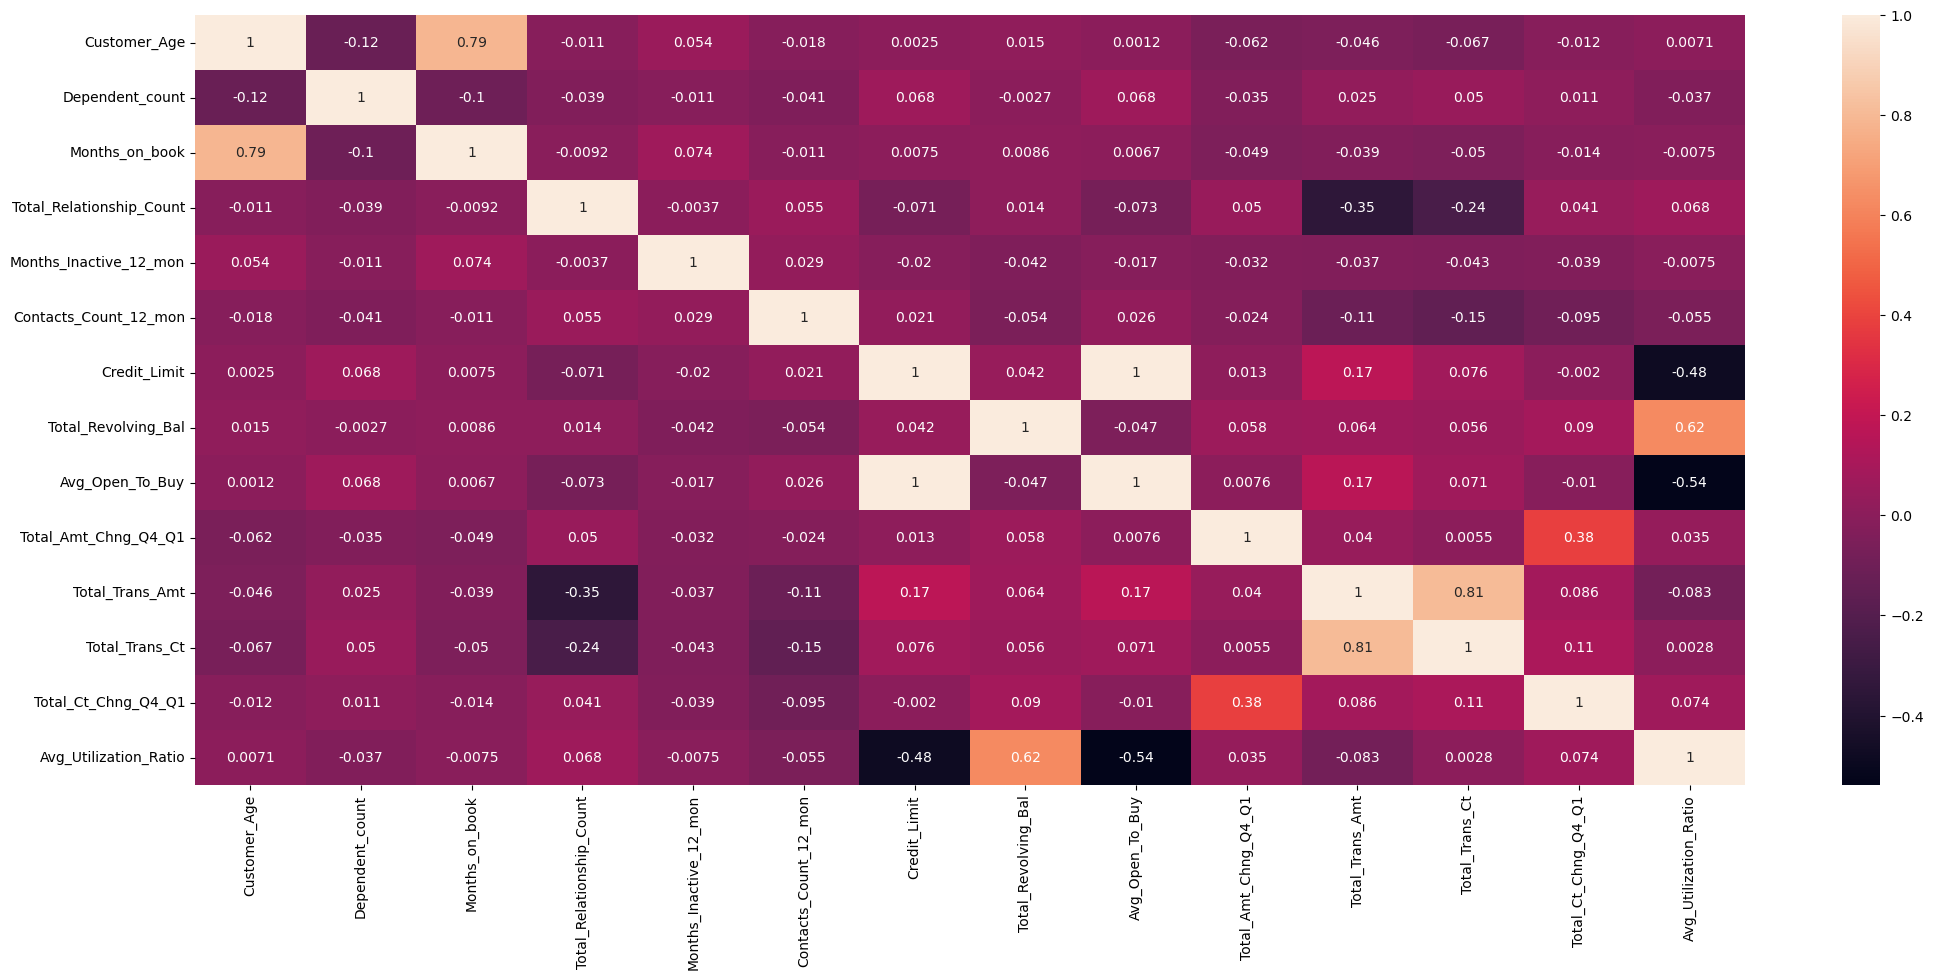

In [26]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,  ax=ax)

### Values close to 1 indicate a strong positive correlation , while values close to -1 indicate a strong negative correlation >> multicolliniarity. Values near 0 suggest little to no correlation.

**Customer_Age vs Months_on_book**

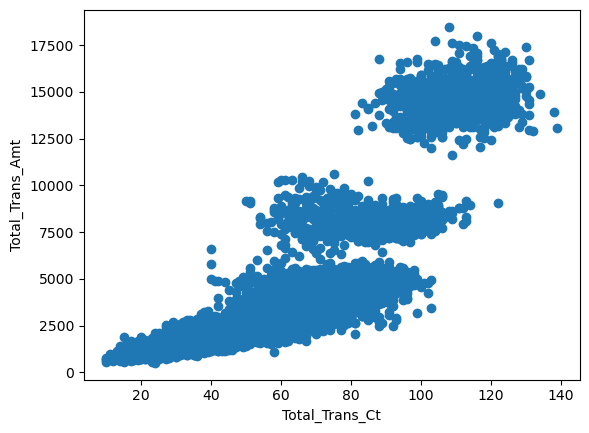

In [27]:
plt.scatter(df.Total_Trans_Ct,df.Total_Trans_Amt)
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Total_Trans_Amt')

plt.show()

**Customer_Age, vs Months_on_book**

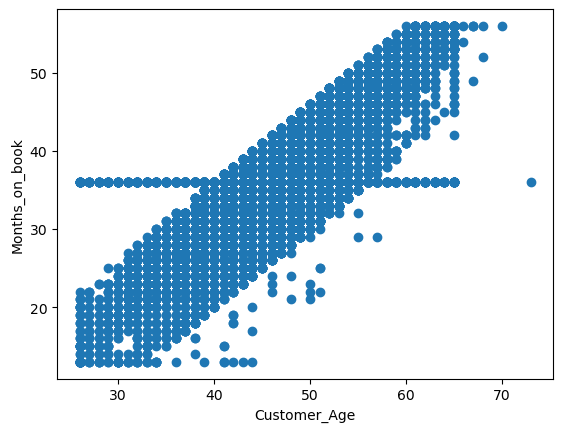

In [28]:
plt.scatter(df.Customer_Age,df.Months_on_book)
plt.xlabel('Customer_Age')
plt.ylabel('Months_on_book')

plt.show()

**Customer_Age vs Credit_Limit**

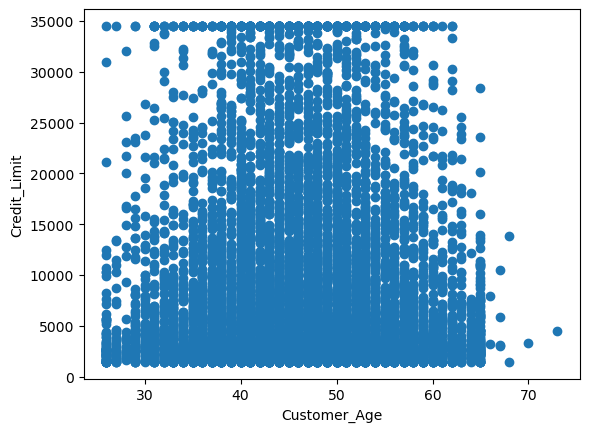

In [68]:
plt.scatter(df.Customer_Age,df.Credit_Limit)
plt.xlabel('Customer_Age')
plt.ylabel('Credit_Limit')

plt.show()

In [63]:
corr= pearsonr(df['Customer_Age'], df['Credit_Limit'])
print(f'Correlation between Customer Age and Credit Limit: {corr}')


Correlation between Customer Age and Credit Limit: PearsonRResult(statistic=0.0024762273596652387, pvalue=0.8032371727735853)


**p-valuye = 0.8032 : Fail to reject Null Hypothesis >> not independent**

**Dependent_count vs Total_Revolving_Bal**

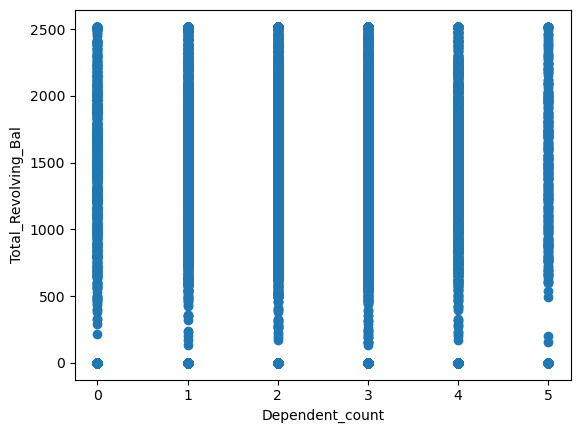

In [69]:
plt.scatter(df.Dependent_count,df.Total_Revolving_Bal)
plt.xlabel('Dependent_count')
plt.ylabel('Total_Revolving_Bal')

plt.show()

**Months_on_book vs Dependent_count**

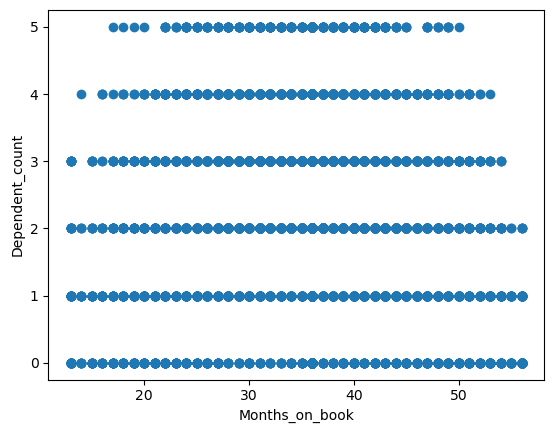

In [29]:
plt.scatter(df.Months_on_book,df.Dependent_count)
plt.xlabel('Months_on_book')
plt.ylabel('Dependent_count')

plt.show()

**Total_Trans_Amt vs Total_Relationship_Count**

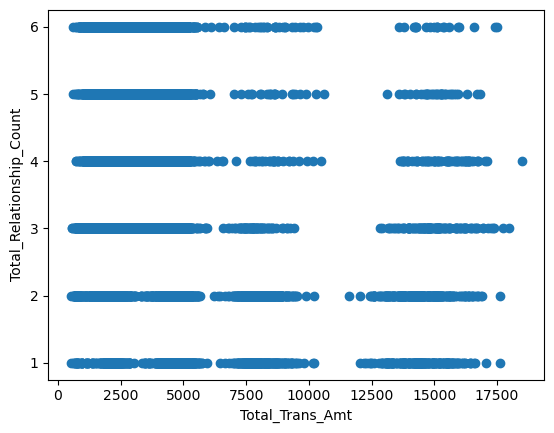

In [30]:
plt.scatter(df.Total_Trans_Amt,df.Total_Relationship_Count)
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Total_Relationship_Count')

plt.show()

**Credit_Limit vs Avg_Utilization_Ratio**

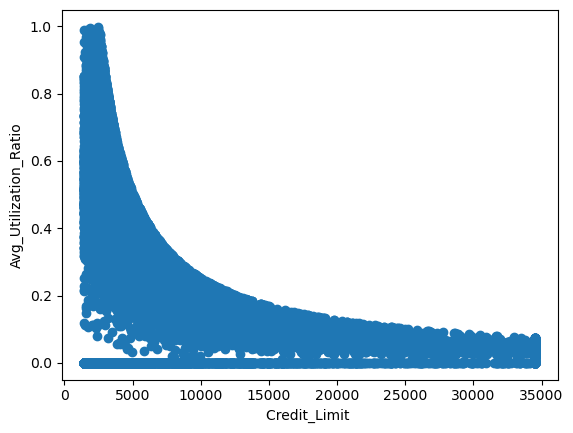

In [32]:
plt.scatter(df.Credit_Limit ,df.Avg_Utilization_Ratio)
plt.xlabel('Credit_Limit ')
plt.ylabel('Avg_Utilization_Ratio')

plt.show()

**Total_Revolving_Bal vs Avg_Utilization_Ratio**

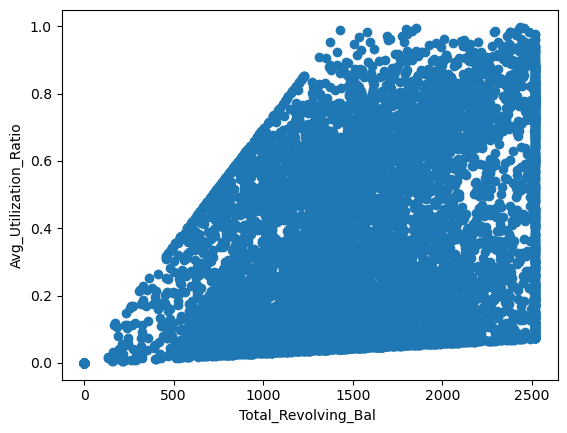

In [33]:
plt.scatter(df.Total_Revolving_Bal ,df.Avg_Utilization_Ratio)
plt.xlabel('Total_Revolving_Bal ')
plt.ylabel('Avg_Utilization_Ratio')

plt.show()

**Avg_Open_To_Buy vs Avg_Utilization_Ratio**

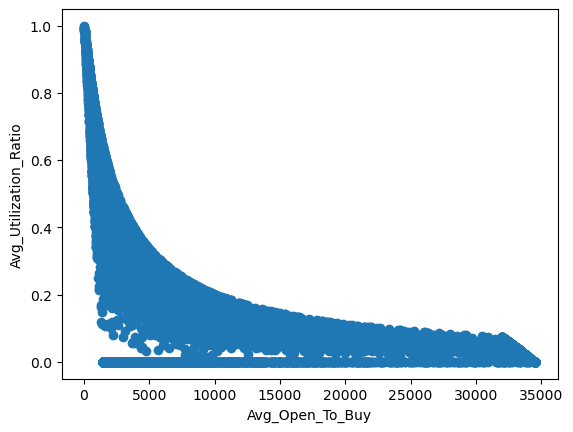

In [34]:
plt.scatter(df.Avg_Open_To_Buy ,df.Avg_Utilization_Ratio)
plt.xlabel('Avg_Open_To_Buy')
plt.ylabel('Avg_Utilization_Ratio')

plt.show()

**Total_Amt_Chng_Q4_Q1 vs Total_Ct_Chng_Q4_Q1**

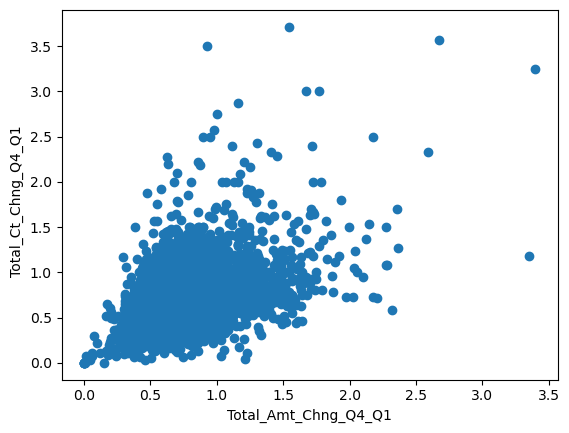

In [35]:
plt.scatter(df.Total_Amt_Chng_Q4_Q1 ,df.Total_Ct_Chng_Q4_Q1   )
plt.xlabel('Total_Amt_Chng_Q4_Q1')
plt.ylabel('Total_Ct_Chng_Q4_Q1   ')

plt.show()

In [67]:
corr = pearsonr(df['Dependent_count'], df['Total_Revolving_Bal'])
print(f'Correlation between Dependent_count and Total_Revolving_Bal: {corr}')

Correlation between Customer Age and Credit Limit: PearsonRResult(statistic=-0.002688145858857713, pvalue=0.7867884865672781)


**pvalue=0.7867884865672781 : Fail to reject Null Hypothesis >> not independent**

# Categorical Vs. Categorical: 

In [73]:
df_char = df.select_dtypes(include=['object'])
df_char.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Married,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [38]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    """ function to check significant difference between two categorical variables"""
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Actual values:\n")
    print(pd.crosstab(df[c1],df[c2],margins = False))
    print("="*100)
    print("Expected values: \n")
    print(exp_val)
    print("="*100)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    print("="*100)
    if exp_val.min()<5 or np.sum(exp_val)<30 : print("\n********************************************\nWarning :We have some small expected \
values or the total number of observations is not enough to get any conclusion\n******************************************** ")
        #Note for sum of all values in dataframe use df.values.sum() and for numpy.ndarray use np.sum(arr)
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is statistiacally significant correlation between {c1} and {c2} at 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between {c1} and {c2}")        

In [37]:
pd.crosstab(df.Attrition_Flag,df.Gender,margins=True) 

Gender,F,M,All
Attrition_Flag,,,
Attrited Customer,930,697,1627
Existing Customer,4428,4072,8500
All,5358,4769,10127


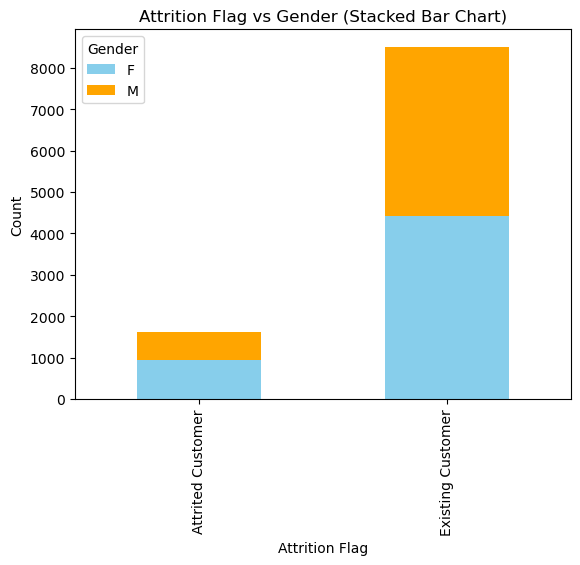

In [40]:
cross_tab1 = pd.crosstab(df.Attrition_Flag, df.Gender, margins=True)
# Stacked bar chart
cross_tab1.drop('All', axis=1).drop('All', axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Adding title and labels
plt.title('Attrition Flag vs Gender (Stacked Bar Chart)')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [39]:
chi_square("Attrition_Flag","Gender")

Actual values:

Gender                F     M
Attrition_Flag               
Attrited Customer   930   697
Existing Customer  4428  4072
Expected values: 

[[ 860.81425891  766.18574109]
 [4497.18574109 4002.81425891]]

Chi-square is : 13.865613700637342 

p_value is : 0.00019635846717310269 

degree of freedom is :1

There is statistiacally significant correlation between Attrition_Flag and Gender at 0.05 significant level


Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   
All                   1013        451      3128         2013            516   

Education_Level    Uneducated  Unknown    All  
Attrition_Flag                                 
Attrited Customer         237      256   1627  
Existing Customer        1250     1263   8500  
All                      1487     1519  10127  


<Axes: xlabel='Attrition_Flag'>

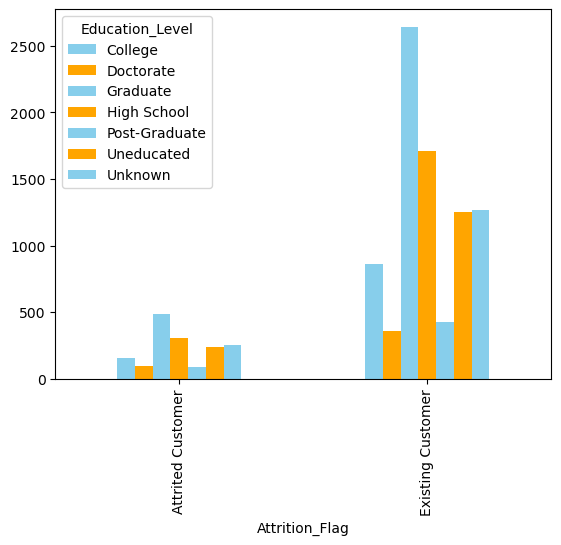

In [41]:
cross_tab2 = pd.crosstab(df.Attrition_Flag, df.Education_Level, margins=True)
print(cross_tab2)

# Plotting grouped bar chart (stacked=False)
cross_tab2.drop('All', axis=1).drop('All', axis=0).plot(kind='bar', stacked=False, color=['skyblue', 'orange'])


In [42]:
chi_square("Attrition_Flag","Education_Level")

Actual values:

Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   

Education_Level    Uneducated  Unknown  
Attrition_Flag                          
Attrited Customer         237      256  
Existing Customer        1250     1263  
Expected values: 

[[ 162.74819789   72.45748988  502.54330009  323.40782068   82.90036536
   238.90085909  244.04196702]
 [ 850.25180211  378.54251012 2625.45669991 1689.59217932  433.09963464
  1248.09914091 1274.95803298]]

Chi-square is : 12.51120540483051 

p_value is : 0.05148913147336627 

degree of freedom is :6

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Attrition_Flag and Educatio

Marital_Status     Divorced  Married  Single    All
Attrition_Flag                                     
Attrited Customer       121      838     668   1627
Existing Customer       627     4598    3275   8500
All                     748     5436    3943  10127


Text(0.5, 1.0, 'Attrition Flag vs Marital_Status(Stacked Bar Chart)')

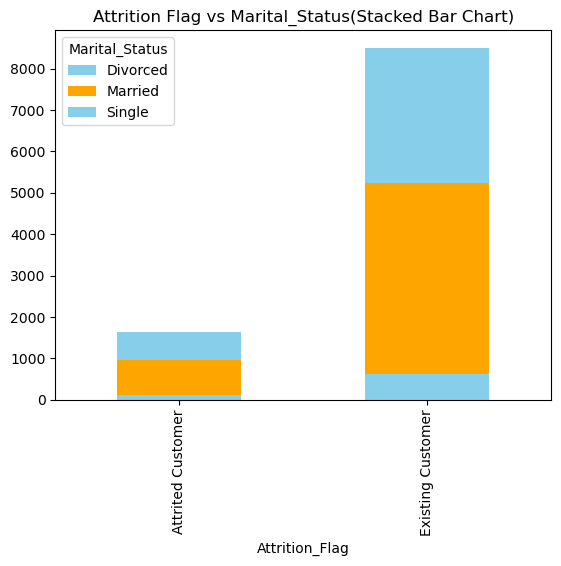

In [43]:
pd.crosstab(df.Attrition_Flag,df.Marital_Status,margins=True) 
cross_tab3 = pd.crosstab(df.Attrition_Flag, df.Marital_Status, margins=True)
print(cross_tab3)
cross_tab3.drop('All', axis=1).drop('All', axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Adding title and labels
plt.title('Attrition Flag vs Marital_Status(Stacked Bar Chart)')

In [44]:
chi_square("Attrition_Flag","Marital_Status")

Actual values:

Marital_Status     Divorced  Married  Single
Attrition_Flag                              
Attrited Customer       121      838     668
Existing Customer       627     4598    3275
Expected values: 

[[ 120.17339785  873.34570949  633.48089266]
 [ 627.82660215 4562.65429051 3309.51910734]]

Chi-square is : 3.9521150185828895 

p_value is : 0.1386146484288065 

degree of freedom is :2

There is no correlation between the two variables( we don't have enough evidence to conclude there is a a statistically significant relationship between Attrition_Flag and Marital_Status


In [45]:
chi_square("Attrition_Flag","Income_Category")

Actual values:

Income_Category    $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Attrition_Flag                                                       
Attrited Customer      126          271          189           242   
Existing Customer      601         1519         1213          1293   

Income_Category    Less than $40K  Unknown  
Attrition_Flag                              
Attrited Customer             612      187  
Existing Customer            2949      925  
Expected values: 

[[ 116.79954577  287.5807248   225.24479115  246.61252098  572.10891676
   178.65350054]
 [ 610.20045423 1502.4192752  1176.75520885 1288.38747902 2988.89108324
   933.34649946]]

Chi-square is : 12.832259274756895 

p_value is : 0.025002425704390617 

degree of freedom is :5

There is statistiacally significant correlation between Attrition_Flag and Income_Category at 0.05 significant level


Card_Category      Blue  Gold  Platinum  Silver    All
Attrition_Flag                                        
Attrited Customer  1519    21         5      82   1627
Existing Customer  7917    95        15     473   8500
All                9436   116        20     555  10127


Text(0.5, 1.0, 'Attrition Flag vs Card_Category(Stacked Bar Chart)')

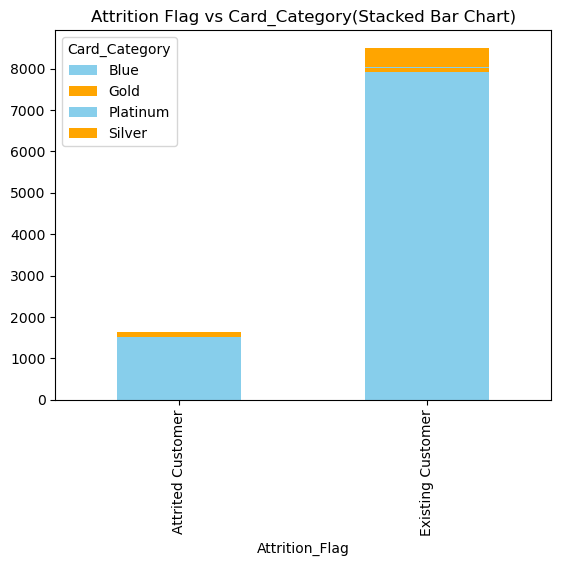

In [46]:
pd.crosstab(df.Attrition_Flag,df.Card_Category,margins=True) 
cross_tab5 = pd.crosstab(df.Attrition_Flag, df.Card_Category, margins=True)
print(cross_tab5)
cross_tab5.drop('All', axis=1).drop('All', axis=0).plot(kind='bar', stacked=True, color=['skyblue', 'orange'])

# Adding title and labels
plt.title('Attrition Flag vs Card_Category(Stacked Bar Chart)')

In [47]:
chi_square("Attrition_Flag","Card_Category")

Actual values:

Card_Category      Blue  Gold  Platinum  Silver
Attrition_Flag                                 
Attrited Customer  1519    21         5      82
Existing Customer  7917    95        15     473
Expected values: 

[[1.51598420e+03 1.86365162e+01 3.21319246e+00 8.91660906e+01]
 [7.92001580e+03 9.73634838e+01 1.67868075e+01 4.65833909e+02]]

Chi-square is : 2.2342267000046805 

p_value is : 0.5252382797994759 

degree of freedom is :3

********************************************
******************************************** 


# Continuous Vs. Categorical: 

### Attrition_Flag vs Customer Age

In [71]:
df.groupby("Attrition_Flag")['Customer_Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.00,46.66,7.67,26.00,41.00,47.00,52.00,68.00
Existing Customer,8500.00,46.26,8.08,26.00,41.00,46.00,52.00,73.00


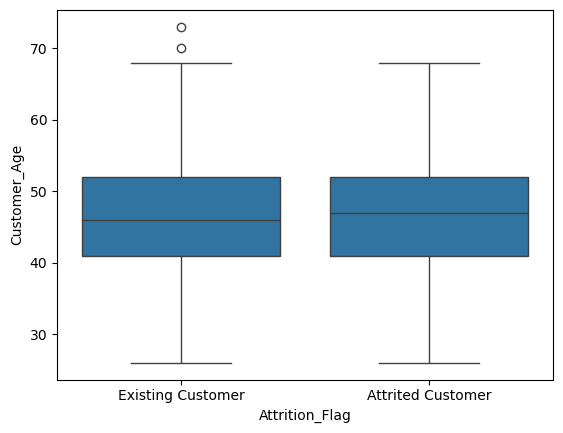

In [72]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)
plt.show()

**Means of two groups looks same**

In [73]:
t_stat, t_p_value = ttest_ind(df[df['Attrition_Flag'] == 'Existing Customer']['Customer_Age'],
                              df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'])
print(f"T-test: p-value = {t_p_value}")


T-test: p-value = 0.06698688501759036


 p-value = 0.06698688501759036, there is significant difference in the mean Customer_Age between the "Existing Customer" group and the "Attrited Customer" group. **fail rejecting the null hypothesis**

### Attrition_Flag vs Credit_Limit

In [74]:
df.groupby("Attrition_Flag")['Credit_Limit'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,,,,,,,,
Attrited Customer,1627.00,8136.04,9095.33,1438.30,2114.00,4178.00,9933.50,34516.00
Existing Customer,8500.00,8726.88,9084.97,1438.30,2602.00,4643.50,11252.75,34516.00


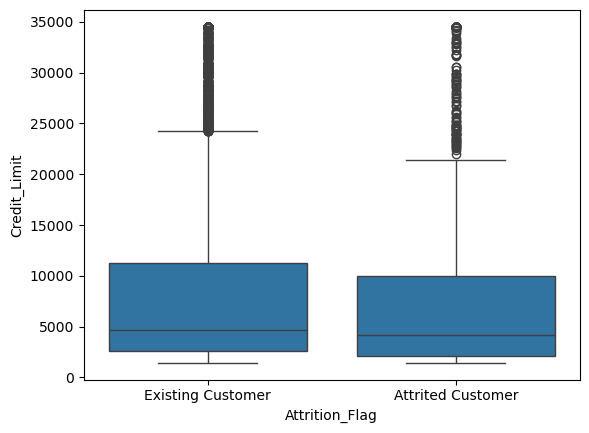

In [75]:
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.show()

In [70]:
t_stat, t_p_value = ttest_ind(df[df['Attrition_Flag'] == 'Existing Customer']['Credit_Limit'],
                              df[df['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit'])
print(f"T-test: p-value = {t_p_value}")


T-test: p-value = 0.016285357205394337


p-value = 0.016285357205394337, there is no significant difference in the mean Customer_Age between the "Existing Customer" group and the "Attrited Customer" group. **rejecting the null hypothesis**

### Bivariante analysis bwt categorical with more than 2 levels vs vontinous variables:

Education_Level
College         1135.78
Doctorate       1094.08
Graduate        1162.38
High School     1194.35
Post-Graduate   1187.67
Uneducated      1154.08
Unknown         1160.45
Name: Total_Revolving_Bal, dtype: float64


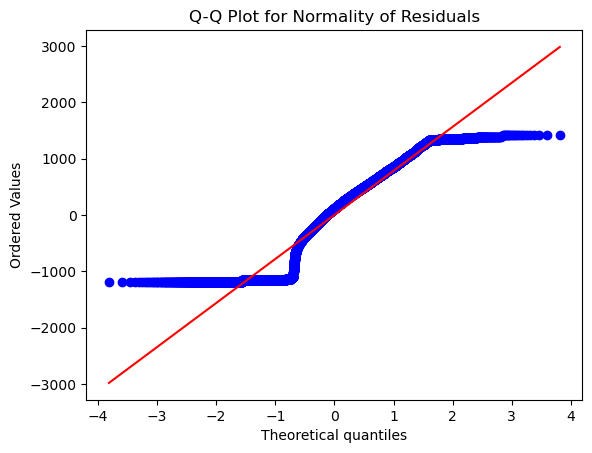

Shapiro-Wilk Test p-value: 0.0
Residuals are not normally distributed (Reject H0).
Levene’s Test p-value: 0.5510875030441376
Variances are equal across groups (Fail to reject H0).


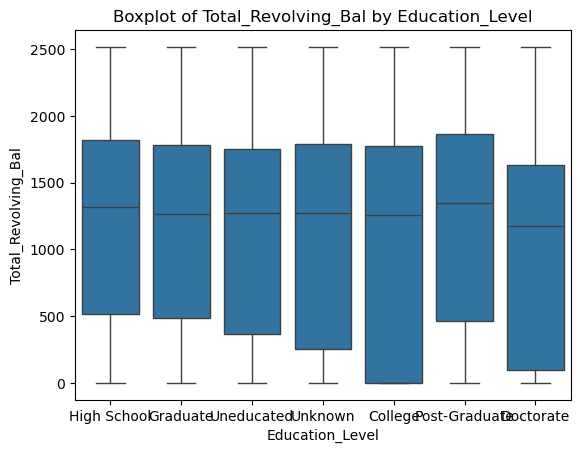

In [242]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is your DataFrame
# 1. Calculate the group means for reference
group_means = df.groupby("Education_Level")["Total_Revolving_Bal"].mean()
print(group_means)

# 2. Fit an ANOVA model (One-Way ANOVA)
model = ols('Total_Revolving_Bal ~ C(Education_Level)', data=df).fit()

# 3. Test for Normality of Residuals
# Q-Q Plot
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality of Residuals")
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')
if shapiro_test.pvalue > 0.05:
    print("Residuals are normally distributed (Fail to reject H0).")
else:
    print("Residuals are not normally distributed (Reject H0).")

# 4. Test for Homogeneity of Variances (Levene's Test)
# Perform Levene's test
levene_test = levene(*[df.loc[df['Education_Level'] == level, 'Total_Revolving_Bal'] 
                       for level in df['Education_Level'].unique()])
print(f'Levene’s Test p-value: {levene_test.pvalue}')
if levene_test.pvalue > 0.05:
    print("Variances are equal across groups (Fail to reject H0).")
else:
    print("Variances are not equal across groups (Reject H0).")

# 5. Plot Boxplot to visually inspect the spread of data
sns.boxplot(x="Education_Level", y="Total_Revolving_Bal", data=df)
plt.title("Boxplot of Total_Revolving_Bal by Education_Level")
plt.show()


In [246]:
from scipy.stats import kruskal

# Extract the data for each Education_Level group
groups = [df.loc[df['Education_Level'] == level, 'Total_Revolving_Bal'] 
          for level in df['Total_Revolving_Bal'].unique()]

# Perform the Kruskal-Wallis Test
kruskal_test = kruskal(*groups)

# Print the test statistic and p-value
print(f'Kruskal-Wallis Test Statistic: {kruskal_test.statistic}')
print(f'Kruskal-Wallis Test p-value: {kruskal_test.pvalue}')

# Interpretation
if kruskal_test.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


Kruskal-Wallis Test Statistic: nan
Kruskal-Wallis Test p-value: nan
Fail to reject the null hypothesis. There is no significant difference between the groups.


In [77]:
df.groupby("Education_Level")["Total_Revolving_Bal"].describe()

,count,mean,std,min,25%,50%,75%,max
Education_Level,,,,,,,,
College,1013.00,1135.78,826.53,0.00,0.00,1258.00,1776.00,2517.00
Doctorate,451.00,1094.08,789.24,0.00,96.50,1176.00,1631.50,2517.00
Graduate,3128.00,1162.38,810.36,0.00,483.50,1262.00,1783.25,2517.00
High School,2013.00,1194.35,821.38,0.00,512.00,1320.00,1822.00,2517.00
Post-Graduate,516.00,1187.67,832.31,0.00,461.50,1344.00,1862.75,2517.00
Uneducated,1487.00,1154.08,807.25,0.00,367.00,1274.00,1751.00,2517.00
Unknown,1519.00,1160.45,816.80,0.00,252.00,1270.00,1785.00,2517.00


In [210]:
df.groupby("Education_Level")["Total_Revolving_Bal"].mean()

Education_Level
College         1135.78
Doctorate       1094.08
Graduate        1162.38
High School     1194.35
Post-Graduate   1187.67
Uneducated      1154.08
Unknown         1160.45
Name: Total_Revolving_Bal, dtype: float64

Means of the groups are different >> 

In [88]:
df["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

Card_Category
Blue        7363.78
Gold       28416.37
Platinum   30283.45
Silver     25277.84
Name: Credit_Limit, dtype: float64


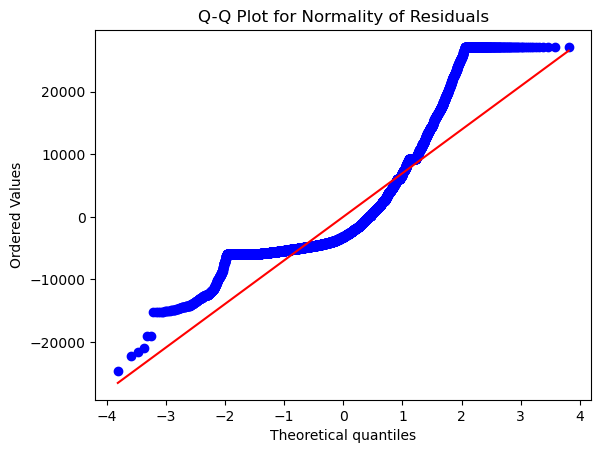

Shapiro-Wilk Test p-value: 0.0
Residuals are not normally distributed (Reject H0).
Levene’s Test p-value: 7.657053175932211e-38
Variances are not equal across groups (Reject H0).


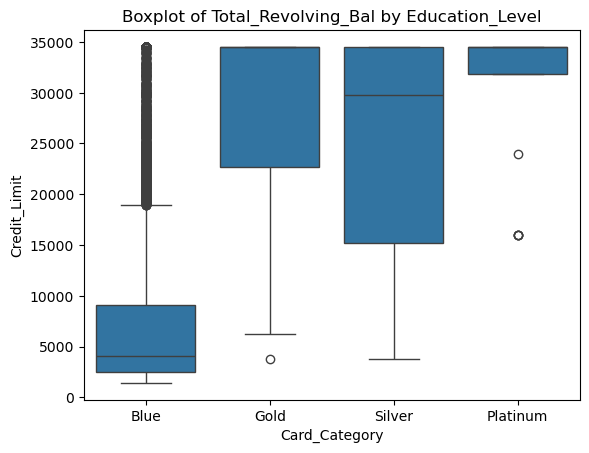

In [244]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming df is your DataFrame
# 1. Calculate the group means for reference
group_means = df.groupby("Card_Category")["Credit_Limit"].mean()
print(group_means)

# 2. Fit an ANOVA model (One-Way ANOVA)
model = ols('Credit_Limit ~ C(Card_Category)', data=df).fit()

# 3. Test for Normality of Residuals
# Q-Q Plot
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality of Residuals")
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')
if shapiro_test.pvalue > 0.05:
    print("Residuals are normally distributed (Fail to reject H0).")
else:
    print("Residuals are not normally distributed (Reject H0).")

# 4. Test for Homogeneity of Variances (Levene's Test)
# Perform Levene's test
levene_test = levene(*[df.loc[df['Card_Category'] == level, 'Credit_Limit'] 
                       for level in df['Card_Category'].unique()])
print(f'Levene’s Test p-value: {levene_test.pvalue}')
if levene_test.pvalue > 0.05:
    print("Variances are equal across groups (Fail to reject H0).")
else:
    print("Variances are not equal across groups (Reject H0).")

# 5. Plot Boxplot to visually inspect the spread of data
sns.boxplot(x="Card_Category", y="Credit_Limit", data=df)
plt.title("Boxplot of Total_Revolving_Bal by Education_Level")
plt.show()


### Both the normality and homogeneity of variance assumptions for ANOVA are violated in this case. As a result, the ANOVA results may not be valid, and a non-parametric alternative - the Kruskal-Wallis test

In [245]:
from scipy.stats import kruskal

# Extract the data for each Education_Level group
groups = [df.loc[df['Card_Category'] == level, 'Credit_Limit'] 
          for level in df['Card_Category'].unique()]

# Perform the Kruskal-Wallis Test
kruskal_test = kruskal(*groups)

# Print the test statistic and p-value
print(f'Kruskal-Wallis Test Statistic: {kruskal_test.statistic}')
print(f'Kruskal-Wallis Test p-value: {kruskal_test.pvalue}')

# Interpretation
if kruskal_test.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


Kruskal-Wallis Test Statistic: 1437.0284348550795
Kruskal-Wallis Test p-value: 2.717783431696e-311
Reject the null hypothesis. There is a significant difference between the groups.


Education_Level
College         8684.54
Doctorate       8413.26
Graduate        8566.10
High School     8605.82
Post-Graduate   8862.56
Uneducated      8899.51
Unknown         8491.80
Name: Credit_Limit, dtype: float64


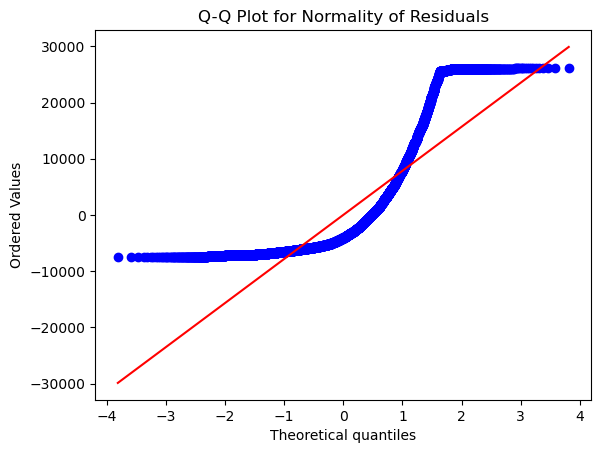

Shapiro-Wilk Test p-value: 0.0
Residuals are not normally distributed (Reject H0).
Levene’s Test p-value: 0.7999234476084305
Variances are equal across groups (Fail to reject H0).


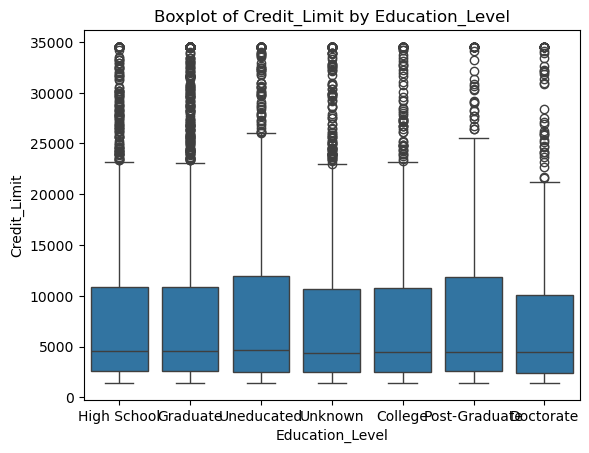

In [220]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols



# 1. Calculate the group means for reference
group_means = df.groupby("Education_Level")["Credit_Limit"].mean()
print(group_means)

# 2. Fit an ANOVA model (One-Way ANOVA)
model = ols('Credit_Limit ~ C(Education_Level)', data=df).fit()

# 3. Test for Normality of Residuals
# Q-Q Plot
residuals = model.resid
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality of Residuals")
plt.show()

# Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue}')
if shapiro_test.pvalue > 0.05:
    print("Residuals are normally distributed (Fail to reject H0).")
else:
    print("Residuals are not normally distributed (Reject H0).")

# 4. Test for Homogeneity of Variances (Levene's Test)
# Perform Levene's test
levene_test = levene(*[df.loc[df['Education_Level'] == level, 'Credit_Limit'] 
                       for level in df['Education_Level'].unique()])
print(f'Levene’s Test p-value: {levene_test.pvalue}')
if levene_test.pvalue > 0.05:
    print("Variances are equal across groups (Fail to reject H0).")
else:
    print("Variances are not equal across groups (Reject H0).")

# 5. Plot Boxplot to visually inspect the spread of data
sns.boxplot(x="Education_Level", y="Credit_Limit", data=df)
plt.title("Boxplot of Credit_Limit by Education_Level")
plt.show()


**AS THE GROUPS ARE NOT NORMALLY DISTRIBUTED, HAVE TO CONDUCT NON-PARAMETRIC TESTS**

In [221]:
from scipy.stats import kruskal

# Extract the data for each Education_Level group
groups = [df.loc[df['Education_Level'] == level, 'Credit_Limit'] 
          for level in df['Education_Level'].unique()]

# Perform the Kruskal-Wallis Test
kruskal_test = kruskal(*groups)

# Print the test statistic and p-value
print(f'Kruskal-Wallis Test Statistic: {kruskal_test.statistic}')
print(f'Kruskal-Wallis Test p-value: {kruskal_test.pvalue}')

# Interpretation
if kruskal_test.pvalue < 0.05:
    print("Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the groups.")


Kruskal-Wallis Test Statistic: 2.54912817121429
Kruskal-Wallis Test p-value: 0.8629294313371791
Fail to reject the null hypothesis. There is no significant difference between the groups.


In [27]:
# Function to perform ANOVA for a numerical column and a categorical column with more than two levels
def anova_independence(numerical_col, categorical_col, df):
    # Group data by the unique categories in the categorical column
    groups = [df[df[categorical_col] == category][numerical_col] for category in df[categorical_col].unique()]
    
    # Perform the ANOVA test
    f_stat, p_val = stats.f_oneway(*groups)
    
    print(f"ANOVA for {numerical_col} by {categorical_col}:")
    print(f"F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")


In [30]:
anova_independence(df['Total_Revolving_Bal'], df["Education_Level"], df)  

KeyError: "None of [Index(['High School', 'Graduate', 'Graduate', 'High School', 'Uneducated',\n       'Graduate', 'Unknown', 'High School', 'Uneducated', 'Graduate',\n       ...\n       'Graduate', 'Unknown', 'Uneducated', 'High School', 'Graduate',\n       'Graduate', 'Unknown', 'High School', 'Graduate', 'Graduate'],\n      dtype='object', length=10127)] are in the [columns]"

# Multicollinearity

In [201]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [202]:
calculate_vif(df_num)

,Feature,VIF
0,Customer_Age,75.09
1,Dependent_count,4.06
2,Months_on_book,56.44
3,Total_Relationship_Count,7.48
4,Months_Inactive_12_mon,6.08
5,Contacts_Count_12_mon,5.54
6,Credit_Limit,inf
7,Total_Revolving_Bal,inf
8,Avg_Open_To_Buy,inf
9,Total_Amt_Chng_Q4_Q1,13.94


In [203]:
vif_results = calculate_vif(df_num)

In [204]:
high_vif = vif_results[vif_results["VIF"] > 10]
if not high_vif.empty:
    print("\nFeatures with high multicollinearity (VIF > 10):")
    print(high_vif)
else:
    print("\nNo features with high multicollinearity (VIF <= 10).")


Features with high multicollinearity (VIF > 10):
                 Feature   VIF
0           Customer_Age 75.09
2         Months_on_book 56.44
6           Credit_Limit   inf
7    Total_Revolving_Bal   inf
8        Avg_Open_To_Buy   inf
9   Total_Amt_Chng_Q4_Q1 13.94
11        Total_Trans_Ct 23.20
12   Total_Ct_Chng_Q4_Q1 11.81


**The features Credit_Limit, Total_Revolving_Bal, and Avg_Open_To_Buy have an infinite VIF value. This typically indicates perfect multicollinearity.**

In [ ]:
#dropping highly mulicollinear features Credit_Limit, Total_Revolving_Bal, and Avg_Open_To_Buy
df=df.drop(columns=['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy'])

# Logistic Regression model: R2, Adjusted R2, RMSE, correlation matrix, and p-values of independent variables 

In [74]:
# using map() funtion to convert column Attrition_Flag from object to int by 'Existing Customer' and 'Attrited Customer' to 1 and 0
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

## Splitting data frame

In [97]:
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']


## One-hot-encoding

In [80]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Check the dtypes of your X dataframe
print(X.dtypes)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
ols = sm.OLS(y, X)
lr = ols.fit()

# Print summary
print(lr.summary())


const                             float64
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_M                             bool
Education_Level_Doctorate            bool
Education_Level_Graduate             bool
Education_Level_High School          bool
Education_Level_Post-Graduate        bool
Education_Level_Uneducated           bool
Education_Level_Unknown              bool
Marital_Status_Married               bool
Marital_Status_Single             

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [81]:
# Check for non-numeric columns in X
print(X.dtypes)  # This will show the data types of each column in X

# Check for any missing values in X and y
print(X.isnull().sum())  # This will print the number of missing values in each column of X
print(y.isnull().sum())  # Check for missing values in the target variable as well


const                             float64
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_M                             bool
Education_Level_Doctorate            bool
Education_Level_Graduate             bool
Education_Level_High School          bool
Education_Level_Post-Graduate        bool
Education_Level_Uneducated           bool
Education_Level_Unknown              bool
Marital_Status_Married               bool
Marital_Status_Single             

In [82]:
# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')


In [83]:
# Option 1: Drop rows with missing values
X = X.dropna()

# Option 2: Fill missing values (if appropriate)
X = X.fillna(0)  # Example: fill NaN with 0, but choose values based on your context


In [71]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import pandas as pd

# Initialize label encoder
le = LabelEncoder()

# Loop through all columns and apply LabelEncoder to categorical columns
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of object (categorical) type
        X[column] = le.fit_transform(X[column])

# Convert all columns to numeric type (in case of any remaining object type columns)
X = X.apply(pd.to_numeric, errors='coerce')

# Check for missing values and fill or drop them if necessary
X = X.dropna()  # Drop rows with missing values (or use .fillna() to handle differently)

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
ols = sm.OLS(y, X)
lr = ols.fit()

# Print summary
print(lr.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [85]:
# Check if y is numeric
print(y.dtype)

# Convert y to numeric if necessary
y = pd.to_numeric(y, errors='coerce')

# Check for missing values in y
print(y.isnull().sum())


int64
0


In [86]:
# Double check data types of X
print(X.dtypes)


const                             float64
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_M                             bool
Education_Level_Doctorate            bool
Education_Level_Graduate             bool
Education_Level_High School          bool
Education_Level_Post-Graduate        bool
Education_Level_Uneducated           bool
Education_Level_Unknown              bool
Marital_Status_Married               bool
Marital_Status_Single             

In [90]:
# Check for any non-numeric data (like strings) in the DataFrame
for col in X.columns:
    if X[col].dtype != 'object':
        # Check if all values in the column are numeric
        non_numeric = X[col].apply(lambda x: isinstance(x, (int, float)))
        if not all(non_numeric):
            print(f"Non-numeric values found in column {col}")


In [91]:
# Force conversion of all columns to float64
X = X.astype(float)


In [92]:
# Check for NaN or infinite values in X
print(X.isnull().sum())  # Check for NaNs
print(np.isfinite(X).all())  # Check for infinite values (should return True for all)


const                             0
Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_M                          0
Education_Level_Doctorate         0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Education_Level_Unknown           0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $4

In [94]:
# Remove columns with constant values
X = X.loc[:, (X != X.iloc[0]).any()]  # This will keep only columns that vary


In [95]:
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Initialize label encoder
le = LabelEncoder()

# Apply LabelEncoder to all object type columns
for column in X.columns:
    if X[column].dtype == 'object':  # Check if the column is of object (categorical) type
        X[column] = le.fit_transform(X[column])

# Convert all columns to numeric type (in case of any remaining object type columns)
X = X.apply(pd.to_numeric, errors='coerce')

# Check for missing values and drop them
X = X.dropna()

# Ensure y is numeric
y = pd.to_numeric(y, errors='coerce')
y = y.dropna()

# Ensure X and y are numeric and without infinite values
X = X.astype(float)  # Convert all columns to float64
y = y.astype(float)

# Check for infinite values or missing values in X and y
print(np.isfinite(X).all())  # Should return True for all
print(np.isfinite(y).all())  # Should return True for all

# Add constant (intercept)
X = sm.add_constant(X)

# Fit the model
ols = sm.OLS(y, X)
lr = ols.fit()

# Print summary
print(lr.summary())



Customer_Age                      True
Dependent_count                   True
Months_on_book                    True
Total_Relationship_Count          True
Months_Inactive_12_mon            True
Contacts_Count_12_mon             True
Credit_Limit                      True
Total_Revolving_Bal               True
Avg_Open_To_Buy                   True
Total_Amt_Chng_Q4_Q1              True
Total_Trans_Amt                   True
Total_Trans_Ct                    True
Total_Ct_Chng_Q4_Q1               True
Avg_Utilization_Ratio             True
Gender_M                          True
Education_Level_Doctorate         True
Education_Level_Graduate          True
Education_Level_High School       True
Education_Level_Post-Graduate     True
Education_Level_Uneducated        True
Education_Level_Unknown           True
Marital_Status_Married            True
Marital_Status_Single             True
Income_Category_$40K - $60K       True
Income_Category_$60K - $80K       True
Income_Category_$80K - $1

### Adj. R-squared: 0.374

In [96]:
#backward feature elimination
maxp = lr.pvalues.max()
while(maxp > 0.05):
    print(f"Adjuste R-Square is {lr.rsquared_adj}")
    print(f"{lr.pvalues.idxmax()} with p-value= {maxp} was dropped\n")
    X.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(y,X)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

Adjuste R-Square is 0.3735643684231311
Education_Level_Graduate with p-value= 0.9820788234807275 was dropped

Adjuste R-Square is 0.37362637887494743
Education_Level_High School with p-value= 0.8022305350055158 was dropped

Adjuste R-Square is 0.37368451697727645
Customer_Age with p-value= 0.5991240251342254 was dropped

Adjuste R-Square is 0.3737293968286044
Marital_Status_Single with p-value= 0.5641062488817545 was dropped

Adjuste R-Square is 0.3737707761953979
Education_Level_Uneducated with p-value= 0.5620976945959105 was dropped

Adjuste R-Square is 0.3738119353817748
Avg_Utilization_Ratio with p-value= 0.29435129071162436 was dropped

Adjuste R-Square is 0.37380575369947033
Education_Level_Unknown with p-value= 0.24162650831391655 was dropped

Adjuste R-Square is 0.37378274384352106
Income_Category_$80K - $120K with p-value= 0.15405255245686117 was dropped

Adjuste R-Square is 0.3737187857646328
Months_on_book with p-value= 0.10865885066674312 was dropped

Adjuste R-Square is 0.

### Education_Level_Graduate Education_Level_High School Customer_Age Marital_Status_Single Education_Level_Uneducated Avg_Utilization_Ratio Education_Level_Unknown Income_Category_$80K - $120K Months_on_book Card_Category_Platinum Card_Category_Silver const - columns are dropped 

### Adj. R-squared (uncentered):0.37 to  0.899 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Acuracy scores

In [102]:


# Load your DataFrame (assumed to be named df)
# df = pd.read_csv('your_data.csv') # Uncomment and modify this line to load your data

# Prepare your data
X = df.drop('Attrition_Flag', axis=1)  # Features
y = df['Attrition_Flag']                # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

# Evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Model: {name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.46      0.57       327
           1       0.90      0.97      0.93      1699

    accuracy                           0.89      2026
   macro avg       0.82      0.71      0.75      2026
weighted avg       0.88      0.89      0.88      2026





In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Let's assume you want to predict 'Credit_Limit' (or any other numerical target)
# Adjust the target variable as per your requirement
target_variable = 'Attrition_Flag'

# Prepare your data
X = df.drop(target_variable, axis=1)  # Features
y = df[target_variable]                # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
regressors = {
    'Linear Regression': LinearRegression()
}

# Evaluate each regressor
for name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")


Model: Linear Regression
Mean Absolute Error: 0.22
Mean Squared Error: 0.09
Root Mean Squared Error: 0.30
R-squared: 0.35


## One-hot-encoding

In [105]:
X = df.drop('Attrition_Flag', axis=1)  # Features
y = df['Attrition_Flag']                # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 9066 to 7270
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    8101 non-null   int64  
 1   Dependent_count                 8101 non-null   int64  
 2   Months_on_book                  8101 non-null   int64  
 3   Total_Relationship_Count        8101 non-null   int64  
 4   Months_Inactive_12_mon          8101 non-null   int64  
 5   Contacts_Count_12_mon           8101 non-null   int64  
 6   Credit_Limit                    8101 non-null   float64
 7   Total_Revolving_Bal             8101 non-null   int64  
 8   Avg_Open_To_Buy                 8101 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            8101 non-null   float64
 10  Total_Trans_Amt                 8101 non-null   int64  
 11  Total_Trans_Ct                  8101 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             8101

In [107]:
y_train.value_counts()

Attrition_Flag
1    6801
0    1300
Name: count, dtype: int64

In [108]:
y_test.value_counts()

Attrition_Flag
1    1699
0     327
Name: count, dtype: int64

# scaling

In [109]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Logestic Regression Modeling

In [73]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
y_pred_log_probs = log_model.predict_proba(X_test_scaled)


In [74]:
log_train_accuracy_score = accuracy_score(y_train, log_model.predict(X_train_scaled))
print(f'log_train_accuracy_score = {log_train_accuracy_score}')


log_test_accuracy_score = accuracy_score(y_test, y_pred_log)
print(f'log_test_accuracy_score = {log_test_accuracy_score}')

log_train_accuracy_score = 0.9053203308233552
log_test_accuracy_score = 0.8978282329713722


In [75]:
cm = confusion_matrix(y_test, y_pred_log)

print(f'confusion_matrix:\n{cm}')
print(f'log_train_accuracy_score = {log_train_accuracy_score}')
print(f'log_test_accuracy_score = {log_test_accuracy_score}')



confusion_matrix:
[[ 176  151]
 [  56 1643]]
log_train_accuracy_score = 0.9053203308233552
log_test_accuracy_score = 0.8978282329713722


In [76]:
print(classification_report(y_test,y_pred_log))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.54      0.63       327
Existing Customer       0.92      0.97      0.94      1699

         accuracy                           0.90      2026
        macro avg       0.84      0.75      0.79      2026
     weighted avg       0.89      0.90      0.89      2026



In [78]:
log_train_f1_score =f1_score(y_train,log_model.predict(X_train_scaled))
print('train_f1_score =')
log_train_f1_score

ValueError: pos_label=1 is not a valid label. It should be one of ['Attrited Customer', 'Existing Customer']

In [119]:
log_test_f1_score =f1_score(y_test,y_pred_log)
print('test_f1_score =')
log_test_f1_score

test_f1_score =


0.9396970563018004

# Decision Tree Classification Accuracy scores

**Train-test-split**

In [38]:
X = df.drop('Attrition_Flag', axis=1)  # Features
y = df['Attrition_Flag']                # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**scaling**

In [39]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**model fitting**

In [40]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#at maxdepth=1

In [42]:
model1 = DecisionTreeClassifier(max_depth=1)#criterion{“gini”, “entropy”}, default=”gini”
#step3 :fit our model on train data set 
model1.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=1)

In [43]:
y_pred1 = model1.predict(X_test_scaled)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

In [45]:
print(accuracy_score(y_train,model1.predict(X_train_scaled)))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.8395259844463646
0.8385982230997039
                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       327
Existing Customer       0.84      1.00      0.91      1699

         accuracy                           0.84      2026
        macro avg       0.42      0.50      0.46      2026
     weighted avg       0.70      0.84      0.76      2026



In [ ]:
#at maxdepth=2

In [46]:
model2 = DecisionTreeClassifier(max_depth=2)
model2.fit(X_train_scaled,y_train)

y_pred2 = model2.predict(X_test_scaled)

In [47]:
print(accuracy_score(y_train,model2.predict(X_train_scaled)))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.8927292926799161
0.8894373149062191
                   precision    recall  f1-score   support

Attrited Customer       0.75      0.47      0.58       327
Existing Customer       0.91      0.97      0.94      1699

         accuracy                           0.89      2026
        macro avg       0.83      0.72      0.76      2026
     weighted avg       0.88      0.89      0.88      2026



In [133]:
#at maxdepth=3

In [48]:
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(X_train_scaled,y_train)
y_pred3 = model3.predict(X_test_scaled)
print(accuracy_score(y_train,model3.predict(X_train_scaled)))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.9144550055548698
0.9180651530108588
                   precision    recall  f1-score   support

Attrited Customer       0.75      0.74      0.74       327
Existing Customer       0.95      0.95      0.95      1699

         accuracy                           0.92      2026
        macro avg       0.85      0.85      0.85      2026
     weighted avg       0.92      0.92      0.92      2026



In [135]:
#at maxdepth=4

In [49]:
model4 = DecisionTreeClassifier(max_depth=4)
model4.fit(X_train_scaled,y_train)
y_pred4 = model4.predict(X_test_scaled)
print(accuracy_score(y_train,model4.predict(X_train_scaled)))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

0.9276632514504383
0.9249753208292202
                   precision    recall  f1-score   support

Attrited Customer       0.87      0.63      0.73       327
Existing Customer       0.93      0.98      0.96      1699

         accuracy                           0.92      2026
        macro avg       0.90      0.81      0.84      2026
     weighted avg       0.92      0.92      0.92      2026



In [50]:
train_scores = []
test_scores = []

for i in range(1,11,1):
    model = DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train_scaled,y_train)
    y_pred_tr = model.predict(X_train_scaled)
    score_tr = accuracy_score(y_train, y_pred_tr)
    #kfold_score = cross_val_score(model, X_train_scaled, y_train, cv = 5).mean()
    train_scores.append(score_tr)
    y_pred_te = model.predict(X_test_scaled)
    score_te = accuracy_score(y_test, y_pred_te)
    test_scores.append(score_te)
    

In [182]:
train_scores

[0.8395259844463646,
 0.8927292926799161,
 0.9144550055548698,
 0.9276632514504383,
 0.9409949388964325,
 0.9558079249475373,
 0.9655598074311813,
 0.9759288976669547,
 0.9832119491420812,
 0.988273052709542]

In [183]:
test_scores

[0.8385982230997039,
 0.8894373149062191,
 0.9180651530108588,
 0.9249753208292202,
 0.9353405725567621,
 0.9387956564659428,
 0.9402764067127345,
 0.9383020730503455,
 0.9407699901283317,
 0.9397828232971372]

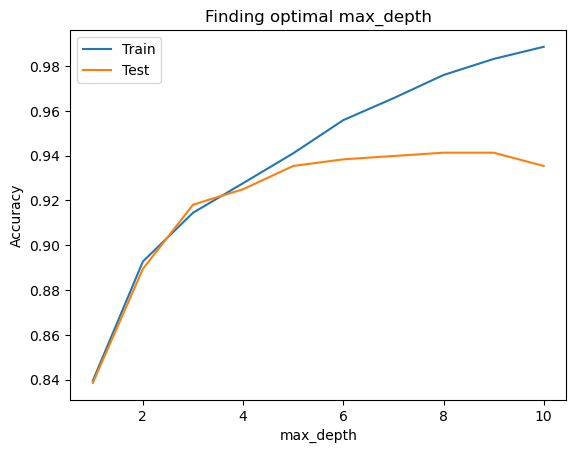

In [51]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1), train_scores, label="Train")
plt.plot(range(1,11,1), test_scores, label="Test")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Finding optimal max_depth")
plt.legend()
plt.show()


**The figure above shows at a maximum depth of 3 or 4, the model peaks the k-fold score and we should not go beyond this to over-complicate the tree. So I'll train a Decision Tree with max-depth 3 on this data set.**

In [52]:
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,11,1):
    model = DecisionTreeClassifier(max_depth=i,random_state=0)
    kfold_score = cross_val_score(model, X, y, cv = 5).mean()
    scores.append(kfold_score)

In [144]:
scores

[0.7308507915615516,
 0.889014368761654,
 0.8918760313455938,
 0.8987876616333346,
 0.8948402617820189,
 0.8982956869340548,
 0.8997779483992053,
 0.8954335856093014,
 0.8972112658891204,
 0.8960272994284182]

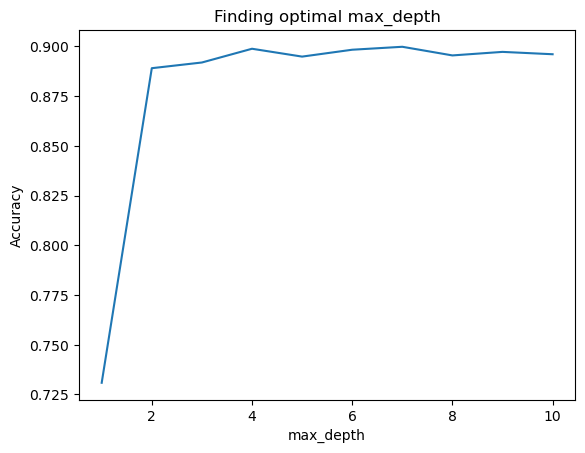

In [145]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Finding optimal max_depth")
plt.show()

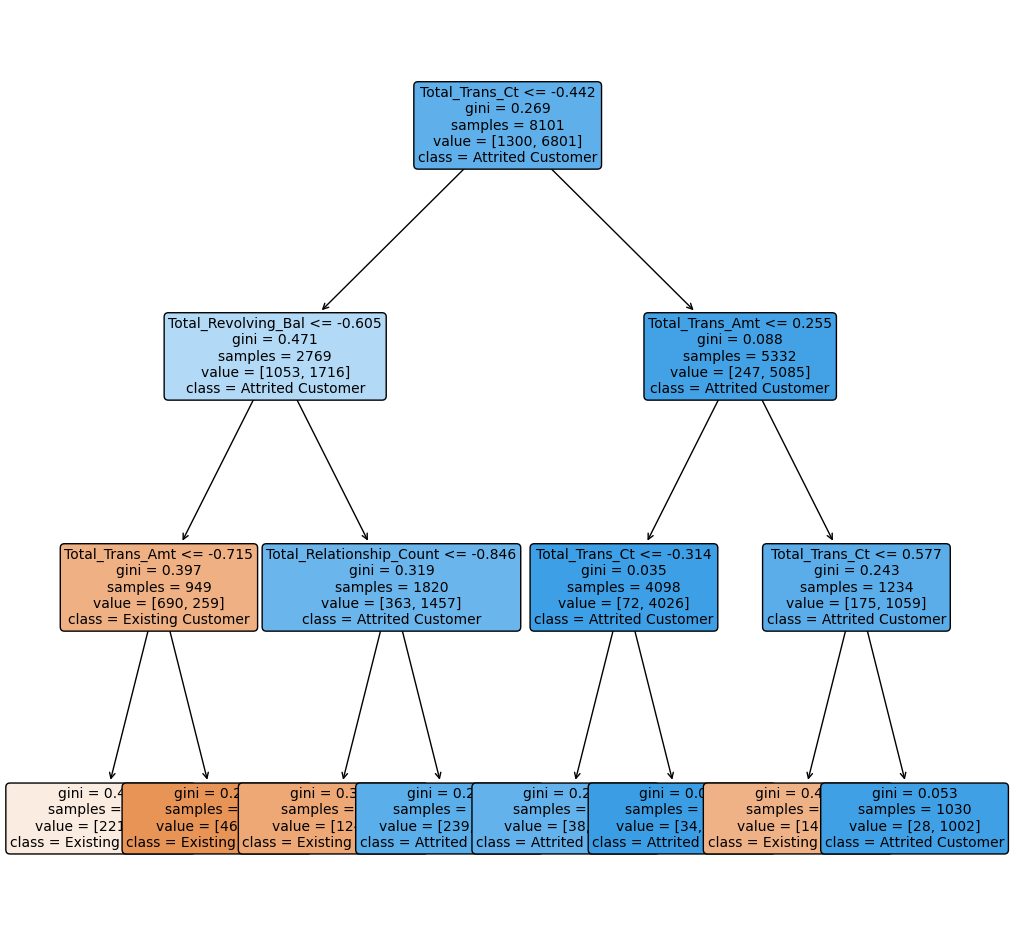

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test_scaled)

# Plot the decision tree
plt.figure(figsize=(12,12))

# Convert class names to strings to avoid the concatenation issue
class_names = [str(label) for label in y_train.unique()]

# Use the original feature names from X_train (before scaling) and converted class names
plot_tree(tree_model, 
          feature_names=X_train.columns,  # Use column names from the original dataset
          class_names=class_names,        # Convert class names to strings
          filled=True,                    # Color the nodes by class
          rounded=True,                   # Rounded corners for a nicer visual appearance
          fontsize=10)                    # Set a suitable font size for readability

# Show the plot
plt.show()


In [72]:
# 13. Model evaluation (classification)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_log))


NameError: name 'y_pred_log' is not defined

## This indicates that the Decision Tree model performs better than the Logistic Regression model in terms of overall accuracy.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [63]:
# Convert numeric values back to categorical
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 1,  'Attrited Customer': 0})    

In [64]:
print(df['Attrition_Flag'].unique())
                             

[1 0]


In [65]:
# 14. Linear Regression and Decision Tree Regressor
# For continuous variable (example: Credit Limit)
X_continuous = df.drop(columns=['Attrition_Flag'])
y_continuous = df['Attrition_Flag']
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(X_continuous, y_continuous, test_size=0.3, random_state=42)


In [66]:
# One-hot encode categorical columns
X_train_cont = pd.get_dummies(X_train_cont, drop_first=True)
X_test_cont = pd.get_dummies(X_test_cont, drop_first=True)


In [67]:
# Scale the data
X_train_cont_scaled = sc.fit_transform(X_train_cont)
X_test_cont_scaled = sc.transform(X_test_cont)


In [68]:
# Check data types of columns in X_train_cont
print(X_train_cont.dtypes)


Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_M                             bool
Education_Level_Doctorate            bool
Education_Level_Graduate             bool
Education_Level_High School          bool
Education_Level_Post-Graduate        bool
Education_Level_Uneducated           bool
Education_Level_Unknown              bool
Marital_Status_Married               bool
Marital_Status_Single                bool
Marital_Status_Unknown            

In [69]:
# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train_cont_scaled, y_train_cont)
y_pred_lin = lin_model.predict(X_test_cont_scaled)

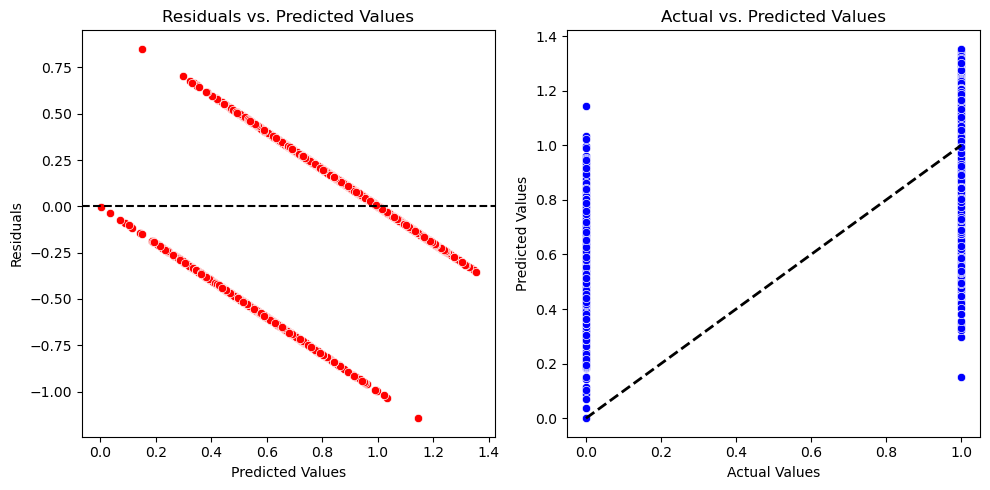

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predict using the model
y_pred_lin = lin_model.predict(X_test_cont_scaled)

# Calculate residuals
residuals = y_test_cont - y_pred_lin

# Plot 1: Residuals vs. Predicted values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_lin, y=residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot 2: Actual vs. Predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_cont, y=y_pred_lin, color='blue')
plt.plot([y_test_cont.min(), y_test_cont.max()], [y_test_cont.min(), y_test_cont.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


In [164]:
# Decision Tree Regressor
tree_reg_model = DecisionTreeRegressor()
tree_reg_model.fit(X_train_cont_scaled, y_train_cont)
y_pred_tree_reg = tree_reg_model.predict(X_test_cont_scaled)


In [165]:
# Evaluation (Regression)
print("Linear Regression R2:", r2_score(y_test_cont, y_pred_lin))
print("Decision Tree Regressor R2:", r2_score(y_test_cont, y_pred_tree_reg))

Linear Regression R2: 0.36177584580159516
Decision Tree Regressor R2: 0.5012613689698476
